**Auteur** : Viktoriya Zeruk<br>
**Date dernière version** : 11/05/2022<br>

---



<div style="display: flex; background: rgb(75,0,130);
background: linear-gradient(90deg, rgba(75,0,130,1) 47%, rgba(216,191,216,1) 89%, rgba(230,230,250,1) 100%);">
<h1 style="margin: auto; font-weight: bold; padding: 30px 30px 0px 30px;" align="center">Project 4 : Segmentez des clients d'un site e-commerce
 </br>  | Analysis notebook | <br></h1> </div>    


<div style="display: flex; background: rgb(75,0,130);
background: linear-gradient(90deg, rgba(75,0,130,1) 47%, rgba(216,191,216,1) 89%, rgba(230,230,250,1) 100%);">
<h4 style="margin: auto; font-weight: bold; padding: 30px 30px 0px 30px;" align="center"> _______________________________________________________________________________________________</h4> 
</div>    

In [1]:
from IPython.display import Image
Image(url='https://growth-mkt-blog-wp-uploads.s3.amazonaws.com/uploads/2021/03/voce-com-olist.gif')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

import datetime as dt


# 1. Exploration et présentation générale du jeu de données

###  1.1 Load Datasets  

In [3]:
#Download databases
df_customers= pd.read_csv('data/olist_customers_dataset.csv',sep=',')
df_geolocation= pd.read_csv('data/olist_geolocation_dataset.csv',sep=',')
df_items= pd.read_csv('data/olist_order_items_dataset.csv',sep=',')
df_payments= pd.read_csv('data/olist_order_payments_dataset.csv',sep=',')
df_reviews= pd.read_csv('data/olist_order_reviews_dataset.csv',sep=',')
df_orders= pd.read_csv('data/olist_orders_dataset.csv',sep=',')
df_products= pd.read_csv('data/olist_products_dataset.csv',sep=',')
df_saler= pd.read_csv('data/olist_sellers_dataset.csv',sep=',')
df_category= pd.read_csv('data/product_category_name_translation.csv',sep=',')

In [4]:
#checking number of columns , column_names and no_of_rows

datasets = [df_customers,
            df_geolocation,
            df_items,
            df_payments,
            df_reviews,
            df_orders,
            df_products,
            df_saler,
            df_category]
titles = ["customers","geolocations","items", "payments", "orders", "products","reviews","sellers","category_translation"]



info_df = pd.DataFrame({},)
info_df['dataset']= titles

info_df['no_of_columns']= [len(df.columns) for df in datasets ]
info_df['columns_name']= [', '.join(list(df.columns)) for df in datasets] 
info_df['no_of_rows'] = [len(df) for df in datasets]

info_df.style.background_gradient(cmap='Purples')
#https://matplotlib.org/stable/tutorials/colors/colormaps.html

,dataset,no_of_columns,columns_name,no_of_rows
0,customers,5,"customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state",99441
1,geolocations,5,"geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state",1000163
2,items,7,"order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value",112650
3,payments,5,"order_id, payment_sequential, payment_type, payment_installments, payment_value",103886
4,orders,7,"review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp",100000
5,products,8,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",99441
6,reviews,9,"product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",32951
7,sellers,4,"seller_id, seller_zip_code_prefix, seller_city, seller_state",3095
8,category_translation,2,"product_category_name, product_category_name_english",71


Dans le système de l'entreprise, chaque commande est attribuée à un identifiant client unique . Cela signifie que le même client obtiendra des identifiants différents pour différentes commandes. Le but d'avoir un client unique_id sur l'ensemble de données est de  permettre d'identifier les clients qui ont effectué des rachats en magasin.

#### Data description


Each feature or columns of different csv files are described below:

* The  `olist_customers_dataset.csv` contain following features:

Feature | Description 
----------|---------------
**customer_id** | Id of the consumer who made the purchase.
**customer_unique_id**    | Unique Id of the consumer.
**customer_zip_code_prefix** | Zip Code of the location of the consumer.
**customer_city** | Name of the City from where order is made.
**customer_state** |  State Code from where order is made(Ex- sao paulo-SP).

* The `olist_sellers_dataset.csv` contains following features:

Feature | Description 
----------|---------------
**seller_id** |   Unique Id of the seller registered in olist.
**seller_zip_code_prefix** | Zip Code of the location of the seller.
**seller_city** | Name of the City of the seller.
**seller_state** | State Code (Ex- sao paulo-SP)


* The `olist_order_items_dataset.csv`  contain following features:

Feature | Description 
----------|---------------
**order_id** | A unique id of order made by the consumers.
**order_item_id** | A Unique id given to each item ordered in the order.
**product_id** |A unique id given to each product available on the site.
**seller_id** | Unique Id of the seller registered in olist.
**shipping_limit_date** | The date before which shipping of the ordered    product must be completed.
**price** | Actual price of the products ordered .
**freight_value** | Price rate at which a product is delivered from one point to another. 

* The `olist_order_payments_dataset.csv` contain following features:

Feature | Description 
----------|---------------
**order_id** | A unique id of order made by the consumers.
**payment_sequential** | sequences of the payments made in case of EMI.
**payment_type** |  mode of payment used.(Ex-Credit Card)
**payment_installments** | number of installments in case of EMI purchase.
**payment_value** | Total amount paid for the purshase order.



* The `olist_orders_dataset.csv`  contain following features:

Feature | Description 
----------|---------------
**order_id** | A unique id of order made by the consumers.
**customer_id** | Id of the consumer who made the purchase.
**order_status** | status of the order made i.e delivered, shipped etc.
**order_purchase_timestamp** | Timestamp of the purchase.
**order_approved_at** | Timestamp of the order approval.
**order_delivered_carrier_date** | delivery date at which carrier made the delivery.
**order_delivered_customer_date** | date at which customer got the product.
**order_estimated_delivery_date** | estimated delivery date of the products.


* The `olist_order_reviews_dataset.csv`  contain following features:

Feature | Description 
----------|---------------
**review_id** |Id of the review given on the product ordered by the order id.
**order_id** |  A unique id of order made by the consumers.
**review_score** | review score given by the customer for each order on the scale of 1–5. 
**review_comment_title** | Title of the review
**review_comment_message** | Review comments posted by the consumer for each order.
**review_creation_date** |Timestamp of the review when it is created.
**review_answer_timestamp** | Timestamp of the review answered.


* The `olist_products_dataset.csv` contain following features:

Feature | Description 
----------|---------------
**product_id** | A unique identifier for the proposed project.
**product_category_name** | Name of the product category
**product_name_lenght** | length of the string which specify the name given to the products ordered.
**product_description_lenght** | length of the description written for each product ordered on the site.
**product_photos_qty** | Number of photos of each product ordered available on the shopping portal.
**product_weight_g** | Weight of the products ordered in grams.
**product_length_cm** | Length of the products ordered in centimeters.
**product_height_cm** | Height of the products ordered in centimeters.
**product_width_cm** | width of the product ordered in centimeters.


### 1.2 dtypes 

In [5]:
#checking dtypes

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
new_df = pd.DataFrame({},)
new_df['dataset']= titles

new_df['numeric_features'] = [len((df.select_dtypes(include=numerics)).columns) for df in datasets]
new_df['num_features_name'] = [', '.join(list((df.select_dtypes(include=numerics)).columns)) for df in datasets]
new_df['object_features'] = [len((df.select_dtypes(include='object')).columns) for df in datasets]
new_df['objt_features_name'] = [', '.join(list((df.select_dtypes(include='object')).columns)) for df in datasets]
new_df['bool_features'] = [len((df.select_dtypes(include='bool')).columns) for df in datasets]
new_df.style.background_gradient(cmap='Purples')

,dataset,numeric_features,num_features_name,object_features,objt_features_name,bool_features
0,customers,1,customer_zip_code_prefix,4,"customer_id, customer_unique_id, customer_city, customer_state",0
1,geolocations,3,"geolocation_zip_code_prefix, geolocation_lat, geolocation_lng",2,"geolocation_city, geolocation_state",0
2,items,3,"order_item_id, price, freight_value",4,"order_id, product_id, seller_id, shipping_limit_date",0
3,payments,3,"payment_sequential, payment_installments, payment_value",2,"order_id, payment_type",0
4,orders,1,review_score,6,"review_id, order_id, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp",0
5,products,0,,8,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",0
6,reviews,7,"product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",2,"product_id, product_category_name",0
7,sellers,1,seller_zip_code_prefix,3,"seller_id, seller_city, seller_state",0
8,category_translation,0,,2,"product_category_name, product_category_name_english",0


# 2 Description / Analyse

###  2.1 Checking for null and missing values in datasets 

In [6]:
#checking no of null values
#code source-https://www.kaggle.com/fayhosseini/brazilian-e-commerce-eda-for-beginners

info_df_n = pd.DataFrame({},)

info_df_n['dataset']= titles

#creating column of name of columns in the dataset 
info_df_n['cols'] = [', '.join([col for col, null in df.isnull().sum().items() ]) for df in datasets]

#creating total number of columns in the dataset 
info_df_n['cols_no']= [df.shape[1] for df in datasets]

#counting total null values
info_df_n['null_no']= [df.isnull().sum().sum() for df in datasets]

#creating total number of columns in the dataset with null-values 
info_df_n['null_cols_no']= [len([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]

#creating column of name of columns in the dataset with null-values 
info_df_n['null_cols'] = [', '.join([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]


info_df_n.style.background_gradient(cmap='Purples')

,dataset,cols,cols_no,null_no,null_cols_no,null_cols
0,customers,"customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state",5,0,0,
1,geolocations,"geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state",5,0,0,
2,items,"order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value",7,0,0,
3,payments,"order_id, payment_sequential, payment_type, payment_installments, payment_value",5,0,0,
4,orders,"review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp",7,146532,2,"review_comment_title, review_comment_message"
5,products,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",8,4908,3,"order_approved_at, order_delivered_carrier_date, order_delivered_customer_date"
6,reviews,"product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",9,2448,8,"product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm"
7,sellers,"seller_id, seller_zip_code_prefix, seller_city, seller_state",4,0,0,
8,category_translation,"product_category_name, product_category_name_english",2,0,0,


In [7]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("The dataset has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [8]:
#variables for each dataframe
pd.DataFrame([df_customers.columns,
              df_geolocation.columns,
              df_items.columns,
              df_payments.columns,
              df_reviews.columns,
              df_orders.columns,
              df_products.columns,
              df_saler.columns,
              df_category.columns],
             index =['customers','geolocation','items','payments',
                     'reviews','orders','products','saler','category']).T

,customers,geolocation,items,payments,reviews,orders,products,saler,category
0,customer_id,geolocation_zip_code_prefix,order_id,order_id,review_id,order_id,product_id,seller_id,product_category_name
1,customer_unique_id,geolocation_lat,order_item_id,payment_sequential,order_id,customer_id,product_category_name,seller_zip_code_prefix,product_category_name_english
2,customer_zip_code_prefix,geolocation_lng,product_id,payment_type,review_score,order_status,product_name_lenght,seller_city,None
3,customer_city,geolocation_city,seller_id,payment_installments,review_comment_title,order_purchase_timestamp,product_description_lenght,seller_state,None
4,customer_state,geolocation_state,shipping_limit_date,payment_value,review_comment_message,order_approved_at,product_photos_qty,None,None
5,None,None,price,None,review_creation_date,order_delivered_carrier_date,product_weight_g,None,None
6,None,None,freight_value,None,review_answer_timestamp,order_delivered_customer_date,product_length_cm,None,None
7,None,None,None,None,None,order_estimated_delivery_date,product_height_cm,None,None
8,None,None,None,None,None,None,product_width_cm,None,None


In [9]:
df_hm=pd.DataFrame([df_customers.shape,
                    df_geolocation.shape,
                    df_items.shape,
                    df_payments.shape,
                    df_reviews.shape,
                    df_orders.shape,
                    df_products.shape,
                    df_saler.shape,
                    df_category.shape],
                   columns=['observations','variables'],
                   index =['customers','geolocation','items',
                           'payments','reviews','orders','products',
                           'saler','category']).T

In [10]:
def tableau(df, title):
  fig, ax = plt.subplots(1, 1, figsize=(20, 20))

  cmap = sns.diverging_palette(230, 20, as_cmap=True)
  sns.heatmap(df, 
              square=True,
              linewidth=2, 
              vmax=80, vmin=1, 
              cmap=cmap, 
              cbar=False, 
              ax=ax,annot=True,
              fmt=".1f",
              annot_kws={'size':16})

  #fig.text( 'Size data', fontweight='bold',
  # fontfamily='serif', fontsize=15, ha='right')   
  import matplotlib.lines as lines
  l1 = lines.Line2D([1.1, 1.1], [0, 1.1],
                    transform=fig.transFigure,
                    figure=fig,
                    color='black',
                    lw=0.5)
  #fig.lines.extend([l1])

  plt.xlabel(title,
             fontsize=12,
             fontweight='light',
             fontfamily='serif')

  plt.tight_layout()
  plt.show()

###  2.2 Data size  

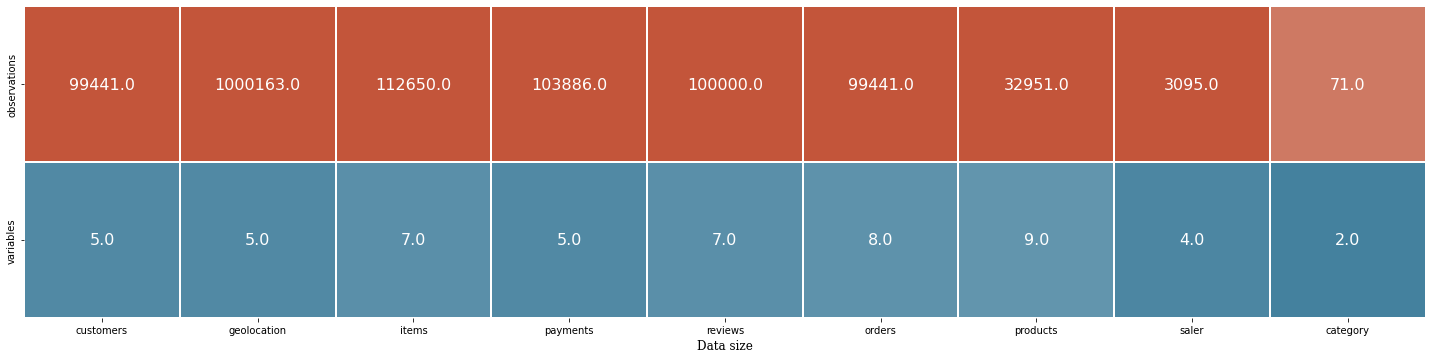

In [11]:
tableau(df_hm,'Data size')

### 2.3 Data  customer_id

In [12]:
df_customers.sample(4)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
35962,7f83186191e40f5e804bc1ad0a95d19b,e5d3ed1d3f37e5943e8a1d1fa20ab21e,8110,sao paulo,SP
98529,4d0090e1484f0896bdc470d0b79b5682,48bf4e8301f352f9a5e832e950d53b77,12062,taubate,SP
47226,e2b825de6fb1e640dc7d4c0a43496e97,d94c6f7934657234a8a77b2879d29fb0,24465,sao goncalo,RJ
866,f1c9108faec06a72a4e597c922ef2622,26c9cb11ad1169f145cc96dc263cbb29,5124,sao paulo,SP


In [13]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [14]:
df_customers.customer_unique_id.unique().shape

(96096,)

On a 96096 clients différents sur notre jeu de données

### 2.4 Localisation géographique des clients du site :

<AxesSubplot:>

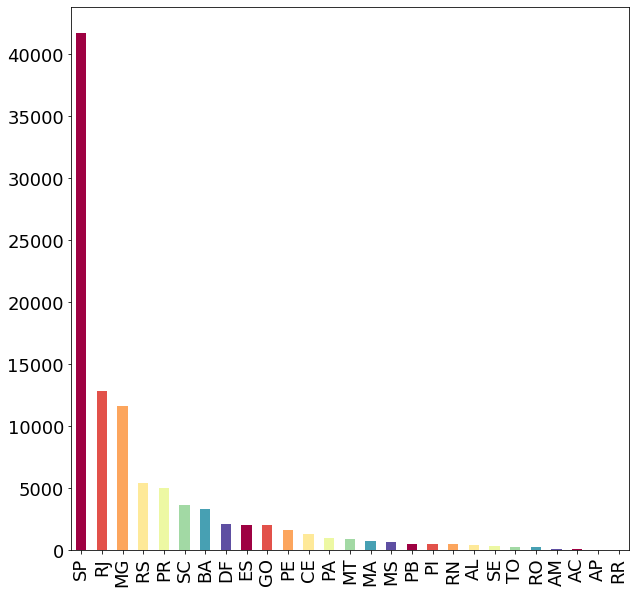

In [15]:
#state of costumer
fig = plt.figure(figsize=(10,10))
df_customers['customer_state'].value_counts().plot(kind='bar',
                                                   color=colors,
                                                   fontsize=18)

In [16]:
df_customers['customer_city'].value_counts()

sao paulo                           15540
rio de janeiro                       6882
belo horizonte                       2773
brasilia                             2131
curitiba                             1521
campinas                             1444
porto alegre                         1379
salvador                             1245
guarulhos                            1189
sao bernardo do campo                 938
niteroi                               849
santo andre                           797
osasco                                746
santos                                713
goiania                               692
sao jose dos campos                   691
fortaleza                             654
sorocaba                              633
recife                                613
florianopolis                         570
jundiai                               565
ribeirao preto                        510
belem                                 447
nova iguacu                       

In [17]:
labels = df_customers["customer_unique_id"].value_counts().index.tolist()
values = df_customers["customer_unique_id"].value_counts().values.tolist()
labels_1 = []
values_1 = []
lat = []
lng = []


for i, elt in enumerate(values):
    if elt >= 5:
        values_1.append(elt)
        labels_1.append(labels[i])


for elt in labels_1:
    customer_zip = \
        df_customers[df_customers.customer_unique_id == elt]["customer_zip_code_prefix"]
    subset = \
        df_geolocation[df_geolocation.geolocation_zip_code_prefix.isin(customer_zip)]
    lat.append(subset["geolocation_lat"].mean())
    lng.append(subset["geolocation_lng"].mean())

In [18]:
import folium

m = folium.Map(location=[-23.56284, -46.6546], zoom_start=7)

i = 0
for (x, y) in zip(lat, lng):

    folium.CircleMarker(location=[x, y],
                        radius=20,
                        popup=labels_1[i],
                        color="#8db600",
                        fill=True,
                        fill_color="#8db600",
                        ).add_to(m)
    i += 1
    


In [19]:
m

### 2.5 Frequency of purchase for each customer

In [20]:
d=pd.DataFrame(df_customers.customer_unique_id.value_counts())
d.columns

Index(['customer_unique_id'], dtype='object')

In [21]:
#Frequency of purchase for each customer
d=pd.DataFrame(pd.DataFrame(df_customers.customer_unique_id.value_counts()).customer_unique_id.value_counts())
lig,col=df_customers.shape
d['rate']=d.customer_unique_id/lig*100
d = d.reset_index()
d.rename(columns = {'index':'frequency',
                    'customer_unique_id':'nb_frequency',
                    'rate':'rate'},
          inplace = True)
d

,frequency,nb_frequency,rate
0,1,93099,93.622349
1,2,2745,2.760431
2,3,203,0.204141
3,4,30,0.030169
4,5,8,0.008045
5,6,6,0.006034
6,7,3,0.003017
7,17,1,0.001006
8,9,1,0.001006


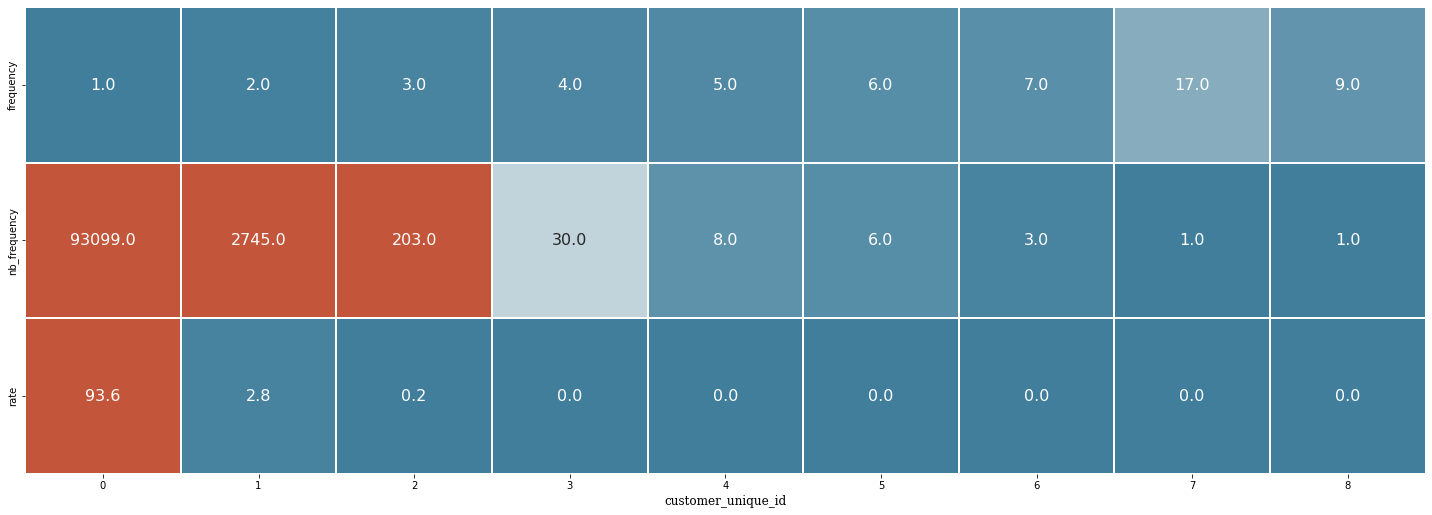

In [22]:
tableau(d.T,'customer_unique_id')

93,6% de nos clients ont acheté sur le site une seule fois.

### 2.6  data: items+ product

**df_products**

Ce dataframe  comprend des données sur les produits vendus par Olist.

In [23]:
df_products.sample(4)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
972,2756f88aa420dd0c5aa25b2db78d4664,telefonia,58.0,381.0,3.0,200.0,19.0,4.0,11.0
8858,22bd45d50bed841763d6f7f58cb7b6ac,perfumaria,54.0,956.0,1.0,50.0,16.0,5.0,11.0
23427,4678fb24818cab9ec956d9b610435d9f,perfumaria,60.0,225.0,2.0,100.0,18.0,4.0,11.0
31480,861857117917aaa99611defcc0d514cd,alimentos,57.0,2585.0,7.0,4450.0,28.0,14.0,28.0


In [24]:
df_category.sample(4)

,product_category_name,product_category_name_english
50,fashion_underwear_e_moda_praia,fashion_underwear_beach
56,eletrodomesticos_2,home_appliances_2
36,construcao_ferramentas_ferramentas,costruction_tools_tools
49,construcao_ferramentas_seguranca,construction_tools_safety


In [25]:
#search for product names in English 
df_products = pd.merge(df_category,
                       df_products,
                       on='product_category_name',
                       how='outer')

In [26]:
#creation of a  Volume_product variable
df_products['Volume_product']=df_products.product_length_cm*df_products.product_height_cm*df_products.product_width_cm

In [27]:
#we delete the unitile variables
df_products.drop(['product_category_name','product_photos_qty',
                  'product_length_cm','product_height_cm',
                  'product_width_cm','product_description_lenght',
                  'product_name_lenght'],
                 axis=1,
                 inplace=True)

In [28]:
df_products.sample(4)

,product_category_name_english,product_id,product_weight_g,Volume_product
5134,auto,b24d74b0c697ec38e9e6da20fa7b80d6,900.0,3192.0
19660,watches_gifts,62f9a2fb6e52ef49cef0254cecab4ba7,190.0,6624.0
11028,furniture_decor,f614b080b510187124d5e964cb35584a,600.0,7072.0
13922,sports_leisure,3d59253b36345baaf95246491607ab6e,2000.0,27720.0


c:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Volume_product', ylabel='Density'>

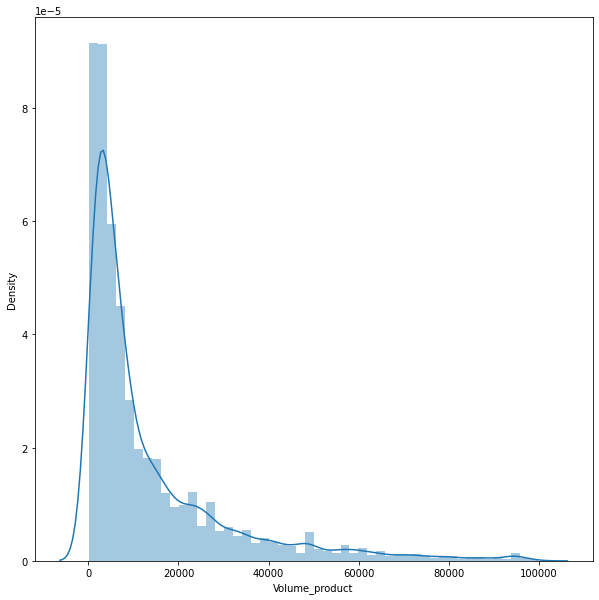

In [29]:
# Plot the histogram 
fig = plt.figure(figsize=(10,10))
sns.distplot( a=df_products[df_products["Volume_product"]<100000]["Volume_product"],
             hist=True,
             kde=True,
             rug=False )

c:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='product_weight_g', ylabel='Density'>

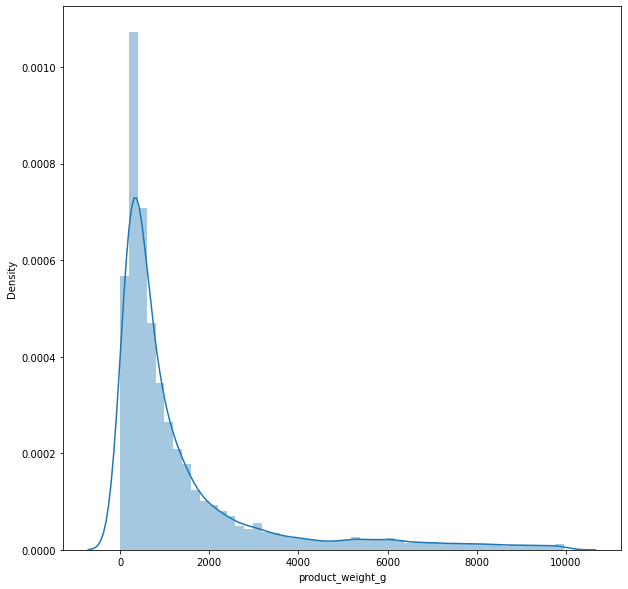

In [30]:
# Plot the histogram of product_weight_g
fig = plt.figure(figsize=(10,10))
sns.distplot( a=df_products[df_products["product_weight_g"]<10000]["product_weight_g"],
             hist=True,
             kde=True,
             rug=False )

**df_items**

Ce dataframe comprend des données sur les articles achetés pour chaque commande.

Exemple: Order_id = 00143d0f86d6fbd9f9b38ab440ac16f5contient 3 articles (même produit). Chaque article a le coût de la livraison calculé en fonction de ses mesures et de son poids. Pour obtenir la valeur totale du livraison pour chaque commande, il vous suffit de faire la somme.

La valeur totale de order_item est: 21.33 * 3 = 63.99

La valeur totale du livraison est: 15.10 * 3 = 45.30

La valeur totale de la commande (produit + livraison) est: 45.30 + 63.99 = 109.29

In [31]:
df_items.sample(4)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
43589,630fef4cb38a0f9fce00a6b096243942,1,4d77aea6b8a42eee8016944ab10c440c,c35affa65afd250151285c5917fc1c8a,2018-07-02 11:18:27,799.99,69.17
105963,f0c8ddc6f3738f7bb122c0250983a494,1,7cfb84c1323fb861a17478de42b1839f,41b39e28db005d9731d9d485a83b4c38,2017-11-03 14:50:21,129.90,13.93
22004,3241baf723e29f140a6ff9082b7f9aca,2,a630323d497e2acc89574e8b792c6936,3bb548e3cb7f70f28e3f11ee9dce0e59,2017-08-08 13:10:10,182.90,13.41
108391,f6574123907a6dbd5a6815a933352dd1,1,0a5a41c678bcf81e041826bb24eb0b01,4b9750c8ad28220fe6702d4ecb7c898f,2018-08-16 21:32:24,48.90,9.09


In [32]:
#merge of df_items dataframe with df_products dataframe on product_id variable
df_items = pd.merge(df_items,
                    df_products,
                    on='product_id',
                    how='outer')
print(df_items.shape)

(112650, 10)


In [33]:
df_items[["price", 'freight_value']].describe()

,price,freight_value
count,112650.000000,112650.000000
mean,120.653739,19.990320
std,183.633928,15.806405
min,0.850000,0.000000
25%,39.900000,13.080000
50%,74.990000,16.260000
75%,134.900000,21.150000
max,6735.000000,409.680000


c:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

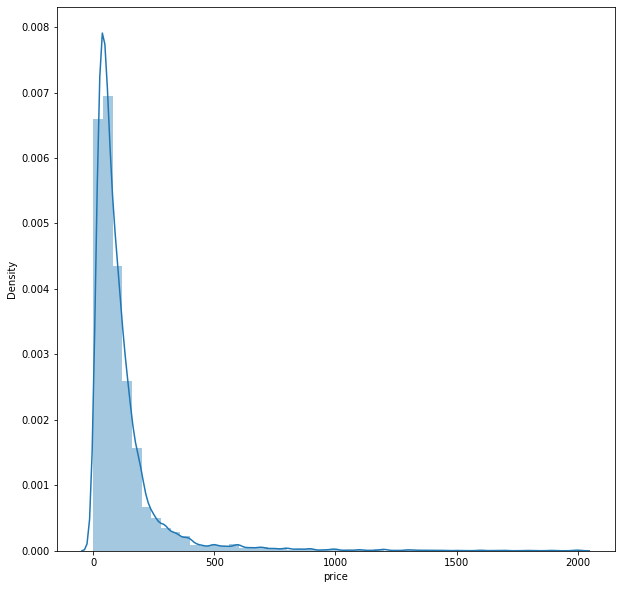

In [34]:
# Plot the histogram of price variable
fig = plt.figure(figsize=(10,10))
sns.distplot( a=df_items[df_items["price"]<2000]["price"],
             hist=True,
             kde=True,
             rug=False )

c:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='freight_value', ylabel='Density'>

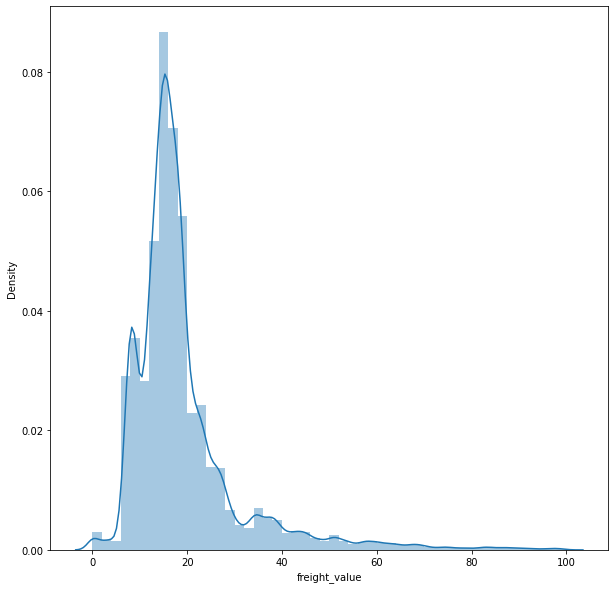

In [35]:
# Plot the histogram of freight_value variable
fig = plt.figure(figsize=(10,10))
sns.distplot( a=df_items[df_items["freight_value"]<100]["freight_value"],
             hist=True,
             kde=True,
             rug=False )

On regroupe les ventes par produit 

**Nombre de produit par commande**

on regarde maintenant les categories

### 2.7 Categories

In [36]:
df_items.product_category_name_english.unique()

array(['cool_stuff', 'pet_shop', 'furniture_decor', 'perfumery',
       'garden_tools', 'housewares', 'telephony', 'health_beauty',
       'books_technical', 'fashion_bags_accessories', 'bed_bath_table',
       'sports_leisure', 'consoles_games', 'office_furniture',
       'luggage_accessories', 'food', 'agro_industry_and_commerce',
       'electronics', 'computers_accessories',
       'construction_tools_construction', 'audio', 'baby',
       'construction_tools_lights', 'toys', 'stationery',
       'industry_commerce_and_business', 'watches_gifts', 'auto', nan,
       'home_appliances', 'kitchen_dining_laundry_garden_furniture',
       'air_conditioning', 'home_confort', 'fixed_telephony',
       'small_appliances_home_oven_and_coffee', 'diapers_and_hygiene',
       'signaling_and_security', 'musical_instruments',
       'small_appliances', 'costruction_tools_garden', 'art',
       'home_construction', 'books_general_interest', 'party_supplies',
       'construction_tools_safety', 'c

In [37]:
# Create a list dictionary of categories
dict_cat = {# Create a list dictionary of categories home
           'office_furniture':'home',
            'housewares':'home',
            'home_confort':'home',
            'furniture_decor':'home',
            'air_conditioning':'home',
            'pet_shop':'home',
            'bed_bath_table':'home',
            'kitchen_dining_laundry_garden_furniture':'home',
            'home_appliances_2':'home','small_appliances':'home',
            'small_appliances_home_oven_and_coffee':'home',
            'home_appliances':'home',
            'signaling_and_security':'home',
            'furniture_living_room':'home',
            'christmas_supplies':'home',
            'furniture_bedroom':'home',
            'furniture_mattress_and_upholstery':'home',
            'la_cuisine':'home',
             'flowers':'home',
            'home_comfort_2':'home',

            # Create a list dictionary of categories pro
            'industry_commerce_and_business':'pro',
            'construction_tools_safety':'pro',
            'construction_tools_construction':'pro',
            'garden_tools':'pro',
            'construction_tools_lights':'pro',
            'home_construction':'pro',
            'costruction_tools_tools':'pro',
            'market_place':'pro',
            'books_technical':'pro',
            'security_and_services':'pro',
            'stationery':'pro',
            'agro_industry_and_commerce':'pro',
            'costruction_tools_garden':'pro',

            # Create a list dictionary of categories hobies
            'sports_leisure':'hobies',
            'toys':'hobies','art':'hobies',
            'cool_stuff':'hobies',
            'books_general_interest':'hobies',
            'musical_instruments':'hobies',
            'music':'hobies',
            'dvds_blu_ray':'hobies',
            'books_imported':'hobies',
            'party_supplies':'hobies',
             'cds_dvds_musicals':'hobies',
            'fashion_sport':'hobies',
            'arts_and_craftmanship':'hobies',
            
            # Create a list dictionary of categories tech
            'computers_accessories':'tech',
            'auto':'tech',
            'telephony':'tech',
            'watches_gifts':'tech',
            'consoles_games':'tech',
            'electronics':'tech',
            'fixed_telephony':'tech',
            'tablets_printing_image':'tech',
            'computers':'tech',
            'audio':'tech',
            'cine_photo':'tech',

            # Create a list dictionary of categories food
            'food_drink':'food',
            'drinks':'food',
            'food':'food',

            # Create a list dictionary of categories health
            'health_beauty':'health',
            'baby':'health',
            'perfumery':'health',
            'diapers_and_hygiene':'health',

            # Create a list dictionary of categories fashion
            'fashio_female_clothing':'fashion',
            'fashion_male_clothing':'fashion',
            'fashion_underwear_beach':'fashion',
            'fashion_shoes':'fashion',
            'fashion_sport':'fashion',
            'fashion_childrens_clothes':'fashion',
            'fashion_bags_accessories':'fashion',
            'luggage_accessories':'fashion'}
  
df_items=df_items.replace({"product_category_name_english": dict_cat})
df_items=df_items.rename(columns={'product_category_name_english': 'catg',
                                  })

<AxesSubplot:>

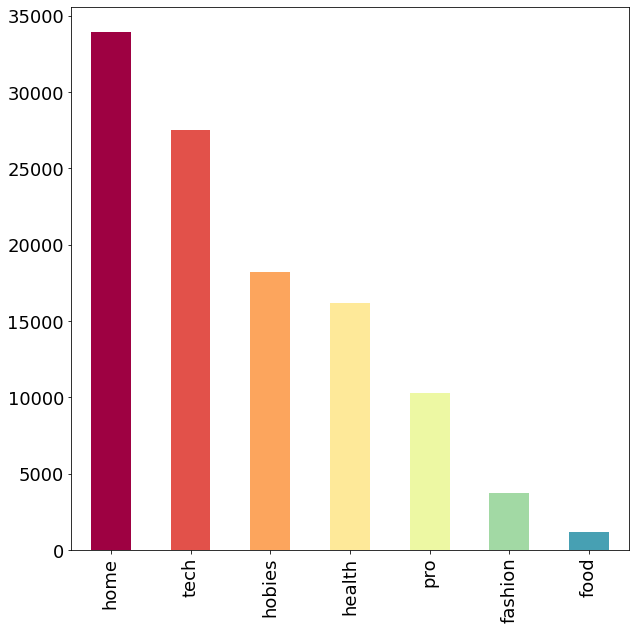

In [38]:
# Plot the histogram of purchased categories
fig = plt.figure(figsize=(10,10))

df_items['catg'].value_counts().plot(kind='bar',
                                     color=colors ,
                                     fontsize=18)


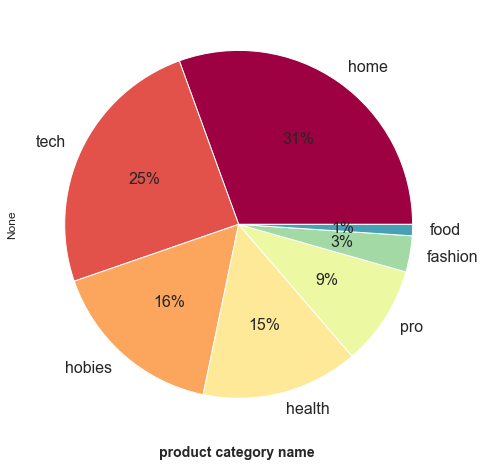

In [39]:
item = df_items.groupby('catg').size().sort_values(ascending= False)

sns.set()
item.plot(kind='pie',
          figsize=[8,8],
          autopct="%.f%%",
          colors=colors ,
          fontsize=16 )
plt.xlabel('product category name ',
           fontsize=14,
           weight='bold')
plt.show()

### 2.8 Nombre de produit differents par commande

In [40]:
#the best seler product
d=pd.DataFrame(pd.DataFrame(df_items.product_id.value_counts()).product_id.value_counts())
lig,col=df_items.shape
d['rate']=d.product_id/lig*100#rate of sale
d = d.reset_index()
d.rename(columns = {'index':'product_sale',
                    'product_id':'nb_sale_frequency',
                    'rate':'rate'},
          inplace = True)
d

,product_sale,nb_sale_frequency,rate
0,1,18117,16.082557
1,2,5817,5.163782
2,3,2651,2.353307
3,4,1534,1.361740
4,5,994,0.882379
5,6,736,0.653351
6,7,515,0.457168
7,8,379,0.336440
8,9,289,0.256547
9,10,251,0.222814


### 2.9 Nombre de vendeur differents par commande

In [41]:
col=['catg']
df_items = pd.get_dummies(data=df_items, 
                          columns= list (col)) 

In [42]:
df_items.sample(4)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_weight_g,Volume_product,catg_fashion,catg_food,catg_health,catg_hobies,catg_home,catg_pro,catg_tech
17184,db6dae09bac5138ab59b6d6c0a1c5284,1,9af7b4a3262141c12ba9bd489a8573c7,aafe36600ce604f205b86b5084d3d767,2018-08-01 02:24:17,47.9,9.65,700.0,2240.0,0,0,0,0,0,1,0
33567,2bb5962dc45a9c428a888aa99d8deb46,1,369dfa384d5ad2a0cb97cb4cda846c47,e9779976487b77c6d4ac45f75ec7afe9,2017-10-10 03:03:49,171.0,15.95,225.0,8100.0,0,0,0,1,0,0,0
94897,74d903ac21372f331f2fa52be9681693,1,8792f8b694229e5627aa6a15cf912052,3785b653b1b82de85ab47dd139938091,2018-02-22 15:06:47,59.9,15.17,1150.0,7942.0,0,0,0,0,1,0,0
66174,a1244e1c9ad5fe2e15f97c9136ef70ab,1,a080d0af331e8a4152c49bfc8113dec9,4830e40640734fc1c52cd21127c341d4,2017-12-04 03:26:07,35.0,9.34,450.0,27000.0,0,0,0,1,0,0,0


In [43]:
df_items.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'product_weight_g',
       'Volume_product', 'catg_fashion', 'catg_food', 'catg_health',
       'catg_hobies', 'catg_home', 'catg_pro', 'catg_tech'],
      dtype='object')

on réalise le premier regroupement sur l'achat / produit /vendeur pour regarder le nombre de produit acheter par commande

In [44]:
#we realize the first groupby on the purchase / product / saller 
#to look at the number of product bought  per order
df_item = df_items.groupby(['order_id',
                            'seller_id',
                            'product_id']).agg({
                                'shipping_limit_date': lambda x: x.max(),
                                'price': lambda x: x.max(),
                                'freight_value': lambda x: x.max(),
                                'order_item_id': 'count',
                                'Volume_product':'max',
                                'product_weight_g':'max',
                                'catg_fashion':'max',
                                'catg_food':'max',
                                'catg_health':'max',
                                'catg_hobies':'max',
                                'catg_home':'max',
                                'catg_pro':'max',
                                'catg_tech':'max'
                                 }).reset_index()

In [45]:
df_item.shape

(102425, 16)

In [46]:
 #the number of purchases per seller (1 seller /number of product purchased)  
 df_item = df_item.groupby(['order_id',
                           'seller_id']).agg({'shipping_limit_date': lambda x: x.max(),#delivery times
                                                'price': lambda x: x.sum(),#purchase value without freight
                                                'freight_value': lambda x: x.sum(),#value freight
                                                'order_item_id': 'sum',#number of products per purchase
                                                'product_id':'count',#number of different products per purchase
                                                'Volume_product':'mean',#average product volume
                                                'product_weight_g':'mean',#average product weight
                                                'catg_fashion':'sum',#number of different sellers per purchase
                                                'catg_food':'sum',#number of products in the category
                                                'catg_health':'sum',#number of products in the category
                                                'catg_hobies':'sum',#number of products in the category
                                                'catg_home':'sum',#number of products in the category
                                                'catg_pro':'sum',#number of products in the category
                                                'catg_tech':'sum' ,#number of products in the category                                 
                                                }).reset_index()

In [47]:
 #Number of order
df_item= df_item.groupby(['order_id']).agg({'shipping_limit_date': lambda x: x.max(),
                                                'price': lambda x: x.sum(),#purchase value without freight
                                                'freight_value': lambda x: x.sum(),#value freight
                                                'order_item_id': 'sum',#number of products per purchase
                                                'product_id':'sum',#number of different products per purchase
                                                'Volume_product':'mean',#average product volume
                                                'product_weight_g':'mean',#average product weight
                                                'seller_id':'count',#number of different sellers per purchase
                                                'catg_fashion':'sum',#number of products in the category
                                                'catg_food':'sum',#number of products in the category
                                                'catg_health':'sum',#number of products in the category
                                                'catg_hobies':'sum',#number of products in the category
                                                'catg_home':'sum',#number of products in the category
                                                'catg_pro':'sum',#number of products in the category
                                                'catg_tech':'sum' ,  #number of products in the category                               
                                                }).reset_index()

In [48]:
df_item.shape

(98666, 16)

In [49]:
df_item.sample(4)

,order_id,shipping_limit_date,price,freight_value,order_item_id,product_id,Volume_product,product_weight_g,seller_id,catg_fashion,catg_food,catg_health,catg_hobies,catg_home,catg_pro,catg_tech
93478,f283e9196449811a7967b7c5d2794418,2017-08-11 03:10:43,63.9,17.70,1,1,5742.0,800.0,1,0,0,0,0,1,0,0
16171,2a4cf847d8e23123b4421ef7f7dc3d9f,2017-09-19 16:50:08,31.9,14.10,1,1,2378.0,250.0,1,0,0,0,0,0,0,1
33146,56014565a50cd432153bbf6a24b8bd97,2017-06-29 20:50:20,199.0,18.64,1,1,27588.0,1950.0,1,0,0,0,1,0,0,0
93151,f1ae9201c5fbf85324c872859f799ac2,2017-12-12 21:52:54,7.9,16.79,1,1,1232.0,200.0,1,0,0,0,0,0,0,1


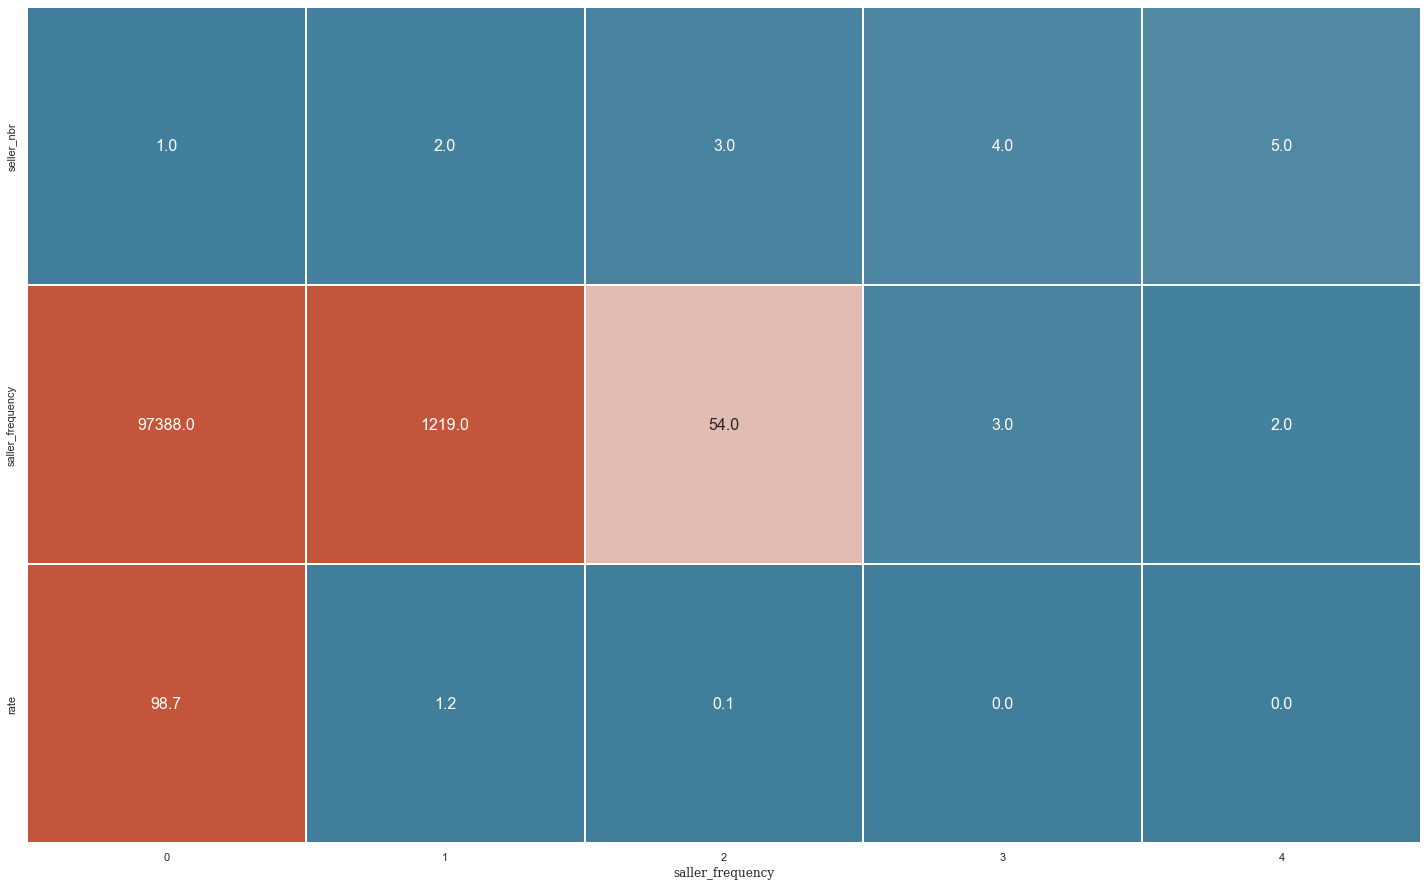

In [50]:
#number of sellers/order
d=pd.DataFrame(df_item.seller_id.value_counts()).reset_index()
lig,col=df_item.shape
d['rate']=d.seller_id/lig*100#rate of sale
d.rename(columns = {'index':'seller_nbr',
                    'seller_id':'saller_frequency',
                    'rate':'rate'},
          inplace = True)
d
tableau(d.T, 'saller_frequency')

98,7% de commande contiennent un seul vendeur par commande

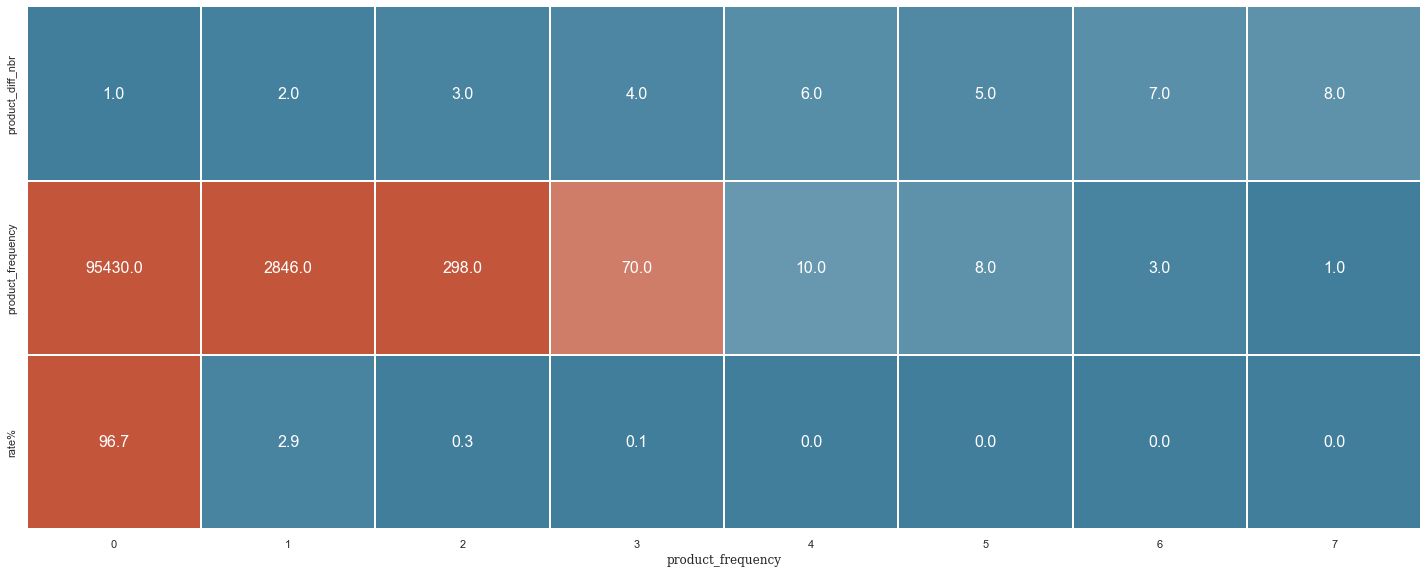

In [51]:
#number of product per order
d=pd.DataFrame(df_item.product_id.value_counts()).reset_index()
lig,col=df_item.shape
d['rate']=d.product_id/lig*100#rate of sale
d.rename(columns = {'index':'product_diff_nbr',
                    'product_id':'product_frequency',
                    'rate':'rate%'},
          inplace = True)
tableau(d.T, 'product_frequency')

96% des commande ont un seul produit par commande 

### 2.10 df_payments

Ensemble de données sur les paiements Cet ensemble de données comprend des données sur les options de paiement des commandes.

In [52]:
df_payments.sample(4)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
4019,559d606ac642899e44550f194fec7e08,1,credit_card,10,262.24
101803,bb9fd560a08ca7403789dedaca85da14,1,credit_card,3,217.30
4192,110bb98db579131adc6f4d8bbd97c673,1,credit_card,1,39.28
99172,ca664b8080d78526b0e1f39b46d9ab3c,1,credit_card,2,28.69


**Mode de payment**

In [53]:
d=pd.DataFrame(df_payments.payment_type.value_counts()).reset_index()#number of payment types per order
lig,col=df_payments.shape
d['rate']=d.payment_type/lig*100#rate
d.rename(columns = {'index':'payment_type',
                    'payment_type':'payment_type_frequency',
                    'rate':'rate'},
          inplace = True)
d

,payment_type,payment_type_frequency,rate
0,credit_card,76795,73.922376
1,boleto,19784,19.043952
2,voucher,5775,5.558978
3,debit_card,1529,1.471806
4,not_defined,3,0.002888


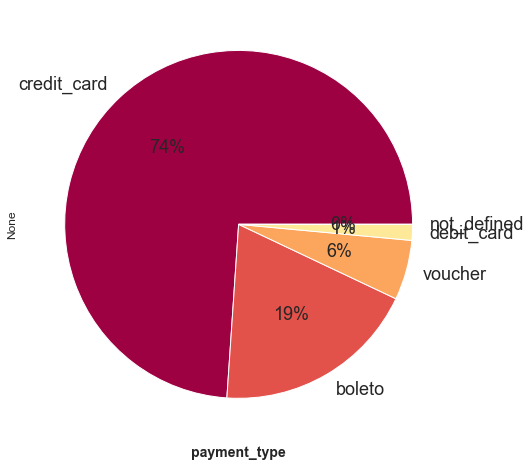

In [54]:
item = df_payments.groupby('payment_type').size().sort_values(ascending= False)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

sns.set()
item.plot(kind='pie',
          figsize=[8,8],
          autopct="%.f%%",
          colors=colors,
          fontsize=18)
plt.xlabel('payment_type',
           fontsize=14,
           weight='bold')
plt.show()

In [55]:
#number of payment methods per order
d=pd.DataFrame(df_payments.payment_sequential.value_counts()).reset_index()
lig,col=df_payments.shape
d['rate']=d.payment_sequential/lig*100
d.rename(columns = {'index':'payment_sequential_type',
                    'payment_type':'payment_sequential_frequency',
                    'rate':'rate'},
          inplace = True)
d

,payment_sequential_type,payment_sequential,rate
0,1,99360,95.643301
1,2,3039,2.925322
2,3,581,0.559267
3,4,278,0.267601
4,5,170,0.163641
5,6,118,0.113586
6,7,82,0.078933
7,8,54,0.051980
8,9,43,0.041392
9,10,34,0.032728


In [56]:
d=pd.DataFrame(df_payments.payment_installments.value_counts()).reset_index()#number of purchasing facilities
lig,col=df_payments.shape
d['rate']=d.payment_installments/lig*100
d.rename(columns = {'index':'payment_installments_nb',
                    'payment_type':'payment_installments_frequency',
                    'rate':'rate'},
          inplace = True)
d

,payment_installments_nb,payment_installments,rate
0,1,52546,50.580444
1,2,12413,11.948675
2,3,10461,10.069692
3,4,7098,6.832489
4,10,5328,5.128699
5,5,5239,5.043028
6,8,4268,4.108350
7,6,3920,3.773367
8,7,1626,1.565177
9,9,644,0.619910


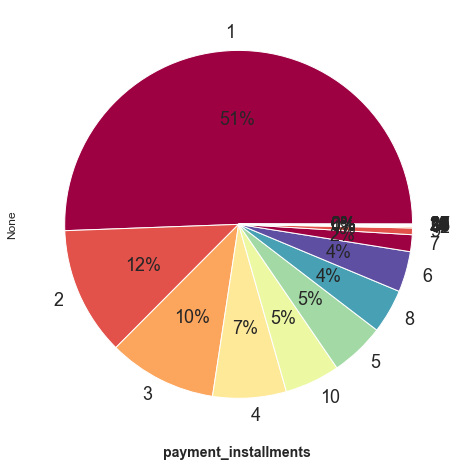

In [57]:
item = df_payments.groupby('payment_installments').size().sort_values(ascending= False)
sns.set()
item.plot(kind='pie',
          figsize=[8,8],
          autopct="%.f%%",
          colors=colors,
          fontsize=18)
plt.xlabel('payment_installments ',
           fontsize=14,
           weight='bold')
plt.show()

### pour grouper les commande on commence par encoder les variables categorielles 

In [58]:
col=['payment_type']
df_payments = pd.get_dummies(data=df_payments,
                             columns= list (col)) 

In [59]:
df_payments.columns

Index(['order_id', 'payment_sequential', 'payment_installments',
       'payment_value', 'payment_type_boleto', 'payment_type_credit_card',
       'payment_type_debit_card', 'payment_type_not_defined',
       'payment_type_voucher'],
      dtype='object')

In [60]:
df_payments = df_payments.groupby(['order_id']).agg({'payment_sequential': 'count',#number of purchasing facilities
                                                'payment_installments': lambda x: x.sum(),#number of purchases by different payment methods (especially for vouchers)
                                                'payment_value': lambda x: x.sum(),#purchase amount 
                                                'payment_type_boleto':'count',#number of purchases by boleto
                                                'payment_type_credit_card': 'count',#number of purchases by credit_card
                                                'payment_type_debit_card': 'count',#number of purchases by debit_card
                                                'payment_type_not_defined': 'count',
                                                'payment_type_voucher': 'count',#number of purchases by voucher
                                                }).reset_index()

### 2.11  data_review

Ce dataframe comprend des données sur les avis effectués par les clients.

Une fois qu'un client achète le produit sur Olist Store, un vendeur est informé de l'exécution de cette commande. Une fois que le client reçoit le produit, ou que la date de livraison estimée est due, le client reçoit une enquête de satisfaction par e-mail où il peut donner une note pour l'expérience d'achat et écrire quelques commentaires.

In [61]:
df_reviews.sample(4)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
47272,1ba18537eede297662157041edcb59ba,08f77a9d173ce275845e91e81500838c,5,NaN,NaN,2018-07-06 00:00:00,2018-07-06 20:08:46
12535,0f7f846b666cd34b1ce39c0ce2a50605,d757eef533ce8e541e4bfbf66b692ec9,5,NaN,NaN,2018-07-26 00:00:00,2018-07-26 21:27:40
1478,071a678bd71a9b375f6b4434d3d263eb,d3e737e1eef1aa87ad5c92bcbf7396dc,4,Bom,Entrega foi rapida sobre o perfume é bom mas j...,2018-04-26 00:00:00,2018-04-27 10:46:06
38055,b5d3ca6df19dc5fa6f3a6c534dfd473c,fb160817be895543f88cd2eb3d7b1946,1,NaN,NaN,2018-01-12 00:00:00,2018-01-12 07:24:49


In [62]:
#creation of a variable length of the message
df_reviews['review_comment_message'] = df_reviews['review_comment_message'].astype(str).apply(lambda x: len(x.strip()))


<AxesSubplot:>

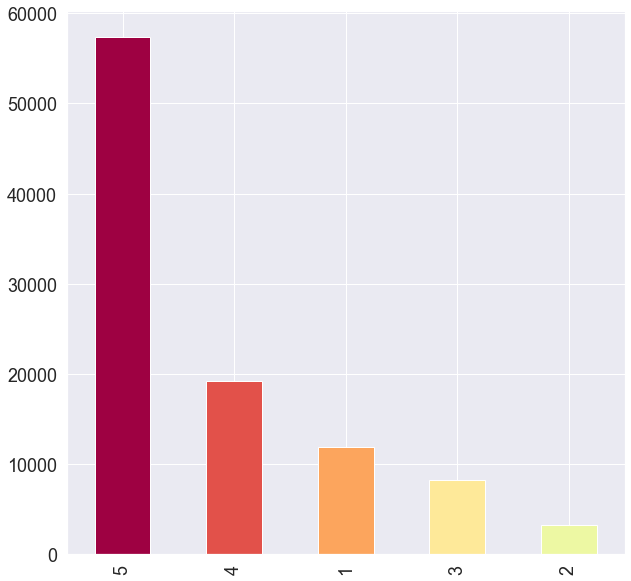

In [63]:
fig = plt.figure(figsize=(10,10))

df_reviews['review_score'].value_counts().plot(kind='bar',
                                               color=colors,
                                               fontsize=18)


<AxesSubplot:xlabel='review_score', ylabel='review_comment_message'>

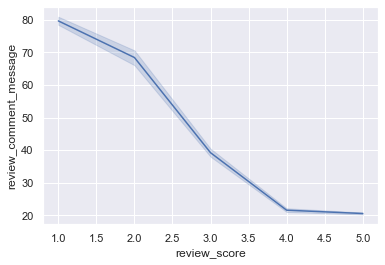

In [64]:
sns.lineplot(y='review_comment_message',
             x='review_score',
             data=df_reviews)


On remarque que plus le commentaire est long plus le client est mécontent

c:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='review_comment_message', ylabel='Density'>

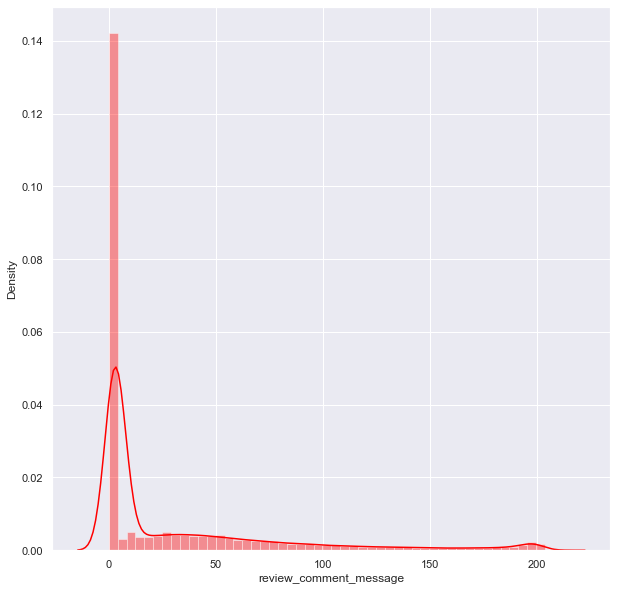

In [65]:
# Plot the histogram 
fig = plt.figure(figsize=(10,10))
sns.distplot( a=df_reviews["review_comment_message"],
             hist=True,
             kde=True,
             rug=False,
             color='Red')

On remarque que plus le message est long plus le score est bas !

In [66]:
df_reviews = df_reviews.groupby(['order_id']).agg({'review_id': 'count',#number of message
                                                'review_score': ['mean','max','min'],#the average score
                                                'review_comment_message' : 'mean',#the average length of message
                                                }).reset_index()

In [67]:
df_reviews.columns = [ '_'.join(str(i) for i in col) for col in df_reviews.columns]
df_reviews.rename(columns = {'order_id_': 'order_id'},
                  inplace = True)

In [68]:
df_reviews.sample(4)

,order_id,review_id_count,review_score_mean,review_score_max,review_score_min,review_comment_message_mean
20974,361f034789232a97f47cc1d000c930ae,1,5.0,5,5,3.0
15261,278b7931248401487747dd5edf32a710,1,4.0,4,4,3.0
33579,5667af66694cc07bce46f7af2ed32ed6,1,1.0,1,1,3.0
34308,58626c8b17b76c4f503f07fd549f6f7f,1,4.0,4,4,54.0


In [69]:
df_reviews.columns

Index(['order_id', 'review_id_count', 'review_score_mean', 'review_score_max',
       'review_score_min', 'review_comment_message_mean'],
      dtype='object')

### 2.12 Data: orders

In [70]:
df_orders.sample(4)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
45569,6223137644b9e1da72b9876c3de86b39,11c94db3776634849fd8aad9e15f1ce7,delivered,2018-05-31 22:10:07,2018-05-31 22:32:25,2018-06-01 15:13:00,2018-06-09 09:56:28,2018-07-13 00:00:00
82472,1594082890bd7c4672ab9c9e4949f305,b47bc65b0868e4d9d38891686c30d68d,delivered,2017-09-11 14:54:34,2017-09-11 15:10:29,2017-09-12 20:13:32,2017-09-19 16:32:54,2017-10-03 00:00:00
16172,4409219388d83b4e077e0537ac46ec0c,bc303aac3563316de8114c1bb12ac2db,delivered,2018-04-21 13:04:58,2018-04-24 18:05:45,2018-04-24 02:07:00,2018-05-11 23:11:38,2018-05-16 00:00:00
76223,38e9145bfbed86212bf884f4a8420fcd,bbc078fbe2bb34f9a55897b99fd5c55a,delivered,2018-01-09 10:21:48,2018-01-09 10:32:47,2018-01-09 22:44:40,2018-01-22 17:04:50,2018-02-02 00:00:00


<AxesSubplot:>

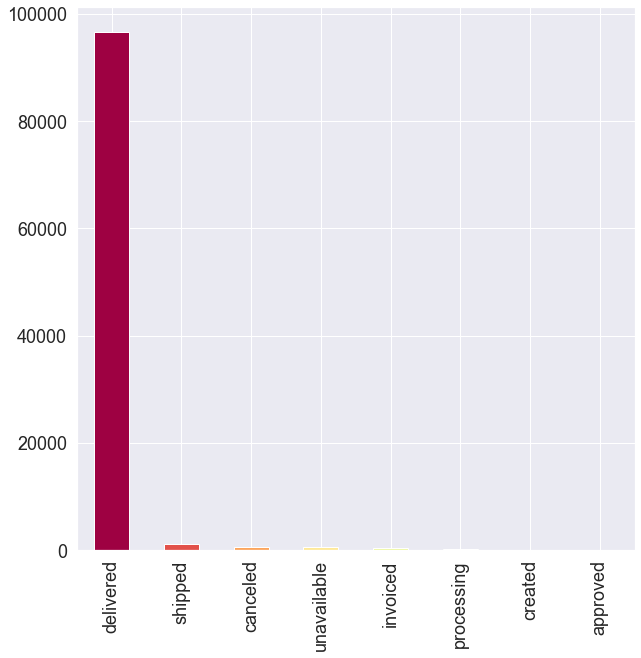

In [71]:
fig = plt.figure(figsize=(10,10))

df_orders['order_status'].value_counts().plot(kind='bar',
                                              color=colors, 
                                              fontsize=18)


On calcule le temps du la finalisation de la commande 

In [72]:
from datetime import datetime
from datetime import date
#create a variable that calculates the time needed to complete a purchase 
#(order_delivered_customer_date-order_purchase_timestamp)

df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'], errors='coerce')
df_orders['order_delivered_customer_date'] = pd.to_datetime(df_orders['order_delivered_customer_date'], errors='coerce')

df_orders["date_purchase"]=df_orders["order_purchase_timestamp"].dt.date
df_orders["month_purchase"]=df_orders["order_purchase_timestamp"].dt.month
df_orders["year_purchase"]=df_orders["order_purchase_timestamp"].dt.year

df_orders["date_delivery"]=df_orders["order_delivered_customer_date"].dt.date



#create a variable :finish_purshase
df_orders['finish_purshase']=df_orders["date_delivery"]-df_orders["date_purchase"]
df_orders['finish_purshase']=df_orders['finish_purshase'].dt.days

# We will no longer need the order_purchase_timestamp and order_delivered_customer_date columns:
df_orders=df_orders.drop(columns="order_delivered_customer_date") 
df_orders=df_orders.drop(columns="date_purchase") 
df_orders=df_orders.drop(columns="date_delivery") 



**Analyse**

c:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='finish_purshase', ylabel='Density'>

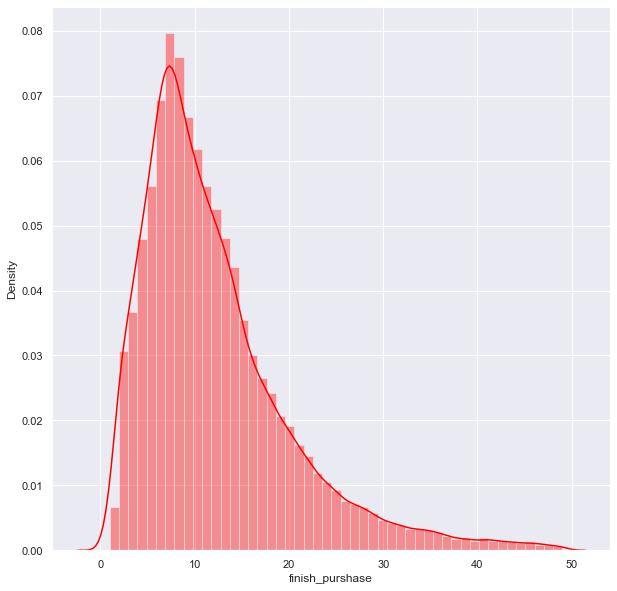

In [73]:
# Plot the histogram of finish_purshase
fig = plt.figure(figsize=(10,10))
sns.distplot( a=df_orders[df_orders['finish_purshase']<50]['finish_purshase'],
             hist=True,
             kde=True,
             rug=False,
             color='Red')

le delais de livrasion ont un pic au tour de 5 jours

c:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='month_purchase', ylabel='Density'>

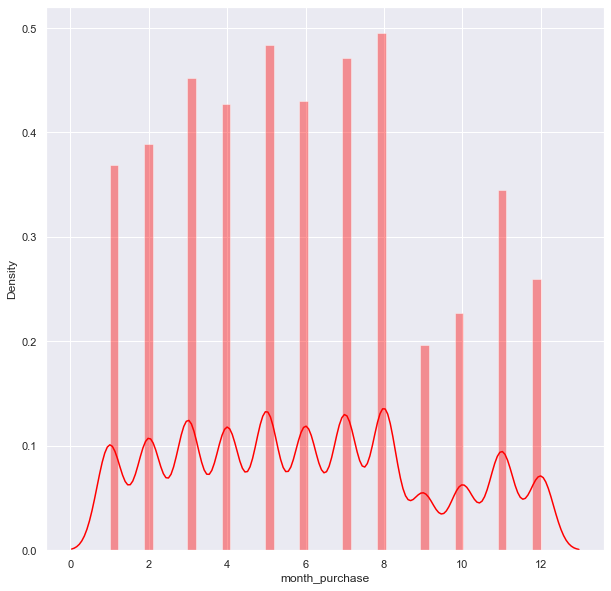

In [74]:
# Plot the histogram of month_purchase
fig = plt.figure(figsize=(10,10))
sns.distplot( a=df_orders["month_purchase"], 
             hist=True, 
             kde=True, 
             rug=False,
             color='Red')

l'été est la meilleurs saisons en nbr de commande

c:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='year_purchase', ylabel='Density'>

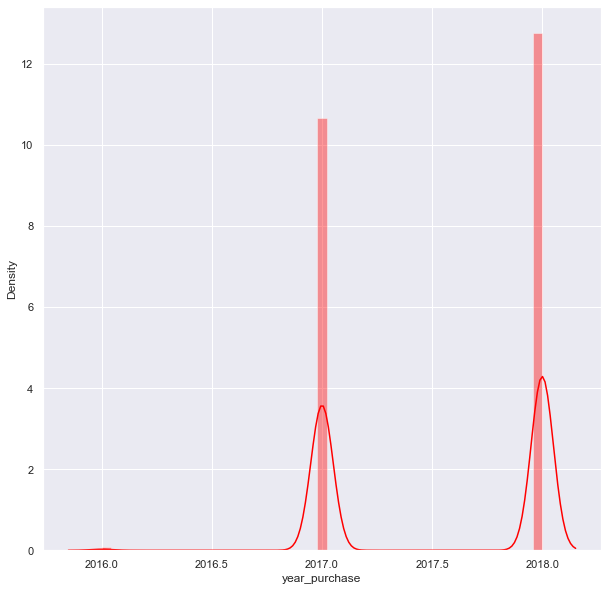

In [75]:
# Plot the histogram of year_purchase
fig = plt.figure(figsize=(10,10))
sns.distplot( a=df_orders['year_purchase'],
             hist=True,
             kde=True, 
             rug=False, 
             color='Red')

une légère augmentation en nbr de commande pour 2018

c:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='order_purchase_timestamp', ylabel='Density'>

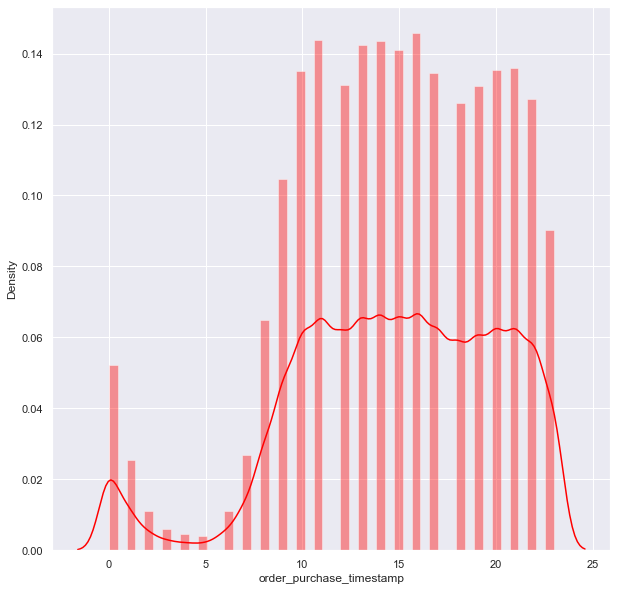

In [76]:
# Plot the histogram order_purchase_timestamp
fig = plt.figure(figsize=(10,10))
sns.distplot( a=df_orders["order_purchase_timestamp"].dt.hour, 
             hist=True,
             kde=True,
             rug=False,
             color='Red')

les meilleurs moments d'achat c'est entre 12 et 15h

In [77]:
#Let's see if there are any problems in the command
Var_drop=['delivered','shipped','invoiced', 'processing','created','approved']
df_orders['order_status'] = np.where(df_orders['order_status'].isin(Var_drop),
                                     0,
                                     1)

In [78]:
#unitile variables are deleted
df_orders.drop(['order_approved_at', 'order_delivered_carrier_date',
       'order_estimated_delivery_date',],axis=1,  inplace=True)

# 3. Merge

on rassemble toute les bases de données en une dataframe

In [79]:
#merge the two data frames df_customers and  df_orders on  customer_id
df_Olist=pd.merge(df_customers, df_orders, on='customer_id', how='outer')
print(df_Olist.shape)# checking the size of the dataframe

#merge the two data frames df_Olist and  df_item on  customer_id
df_Olist=pd.merge(df_Olist, df_item, on='order_id', how='outer')
print(df_Olist.shape)# checking the size of the dataframe

#merge the two data frames df_Olist and  df_payments on  customer_id
df_Olist=pd.merge(df_Olist, df_payments, on='order_id', how='outer')
print(df_Olist.shape)# checking the size of the dataframe

#merge the two data frames df_Olist and  df_reviews on  customer_id
df_Olist=pd.merge(df_Olist, df_reviews, on='order_id', how='outer')
print(df_Olist.shape)# checking the size of the dataframe

(99441, 11)
(99441, 26)
(99441, 34)
(99441, 39)


In [80]:
df_Olist.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,month_purchase,year_purchase,finish_purshase,shipping_limit_date,price,freight_value,order_item_id,product_id,Volume_product,product_weight_g,seller_id,catg_fashion,catg_food,catg_health,catg_hobies,catg_home,catg_pro,catg_tech,payment_sequential,payment_installments,payment_value,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_not_defined,payment_type_voucher,review_id_count,review_score_mean,review_score_max,review_score_min,review_comment_message_mean
96053,1ec264df7a63b93ee299b3e17c356e3b,623674d39fd0350df92b1f91c469ba39,23075,rio de janeiro,RJ,095e9e0811476409362d72fa70d73a6c,0,2018-02-08 18:36:24,2,2018,11.0,2018-02-20 17:50:43,82.00,17.01,1.0,1.0,4200.0,280.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,99.01,1.0,1.0,1.0,1.0,1.0,2,4.0,5,3,101.5
42469,2f6cdb93c2573a1a5f1a2d927c574ec4,76e6f809c9669a0ee948d285c2328883,18400,itapeva,SP,75c84c78ed440df887c1dd6d38311dca,0,2018-07-07 21:15:11,7,2018,6.0,2018-07-09 21:25:34,29.99,12.87,1.0,1.0,4800.0,300.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,42.86,1.0,1.0,1.0,1.0,1.0,1,3.0,3,3,39.0
70451,28894762f8e436444ad220a622378fc7,9fbb9f39da9ccd87bf143cd0532c0164,90570,porto alegre,RS,4b18f35d97c3ba68a1034e92dce1a2e1,0,2017-08-21 19:15:48,8,2017,3.0,2017-08-25 19:25:39,259.90,9.40,1.0,1.0,1728.0,200.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,10.0,269.30,1.0,1.0,1.0,1.0,1.0,1,5.0,5,5,3.0
21465,f253023c8f1e0fa8abc68b0180cf96a8,7cd148c92a7b9203793efe0844c45e52,95700,bento goncalves,RS,374287ecf047f9180fdb554bc4ae1c1d,0,2018-02-23 17:19:34,2,2018,39.0,2018-03-06 17:30:58,250.00,62.49,1.0,1.0,70875.0,12250.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5.0,312.49,1.0,1.0,1.0,1.0,1.0,1,2.0,2,2,154.0
51744,69669556c0498b560a9eda5bcabdec2d,3defdac1cf5b779689353f537aa723d6,2351,sao paulo,SP,301b453872955e08f7aed322d6a0753a,0,2017-12-16 05:13:04,12,2017,4.0,2017-12-21 05:31:32,89.90,7.88,1.0,1.0,2772.0,400.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,97.78,1.0,1.0,1.0,1.0,1.0,1,4.0,4,4,172.0


In [81]:
df_Olist.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'month_purchase', 'year_purchase',
       'finish_purshase', 'shipping_limit_date', 'price', 'freight_value',
       'order_item_id', 'product_id', 'Volume_product', 'product_weight_g',
       'seller_id', 'catg_fashion', 'catg_food', 'catg_health', 'catg_hobies',
       'catg_home', 'catg_pro', 'catg_tech', 'payment_sequential',
       'payment_installments', 'payment_value', 'payment_type_boleto',
       'payment_type_credit_card', 'payment_type_debit_card',
       'payment_type_not_defined', 'payment_type_voucher', 'review_id_count',
       'review_score_mean', 'review_score_max', 'review_score_min',
       'review_comment_message_mean'],
      dtype='object')

In [82]:
df_Olist.shape

(99441, 39)

**Les valeurs manquantes**

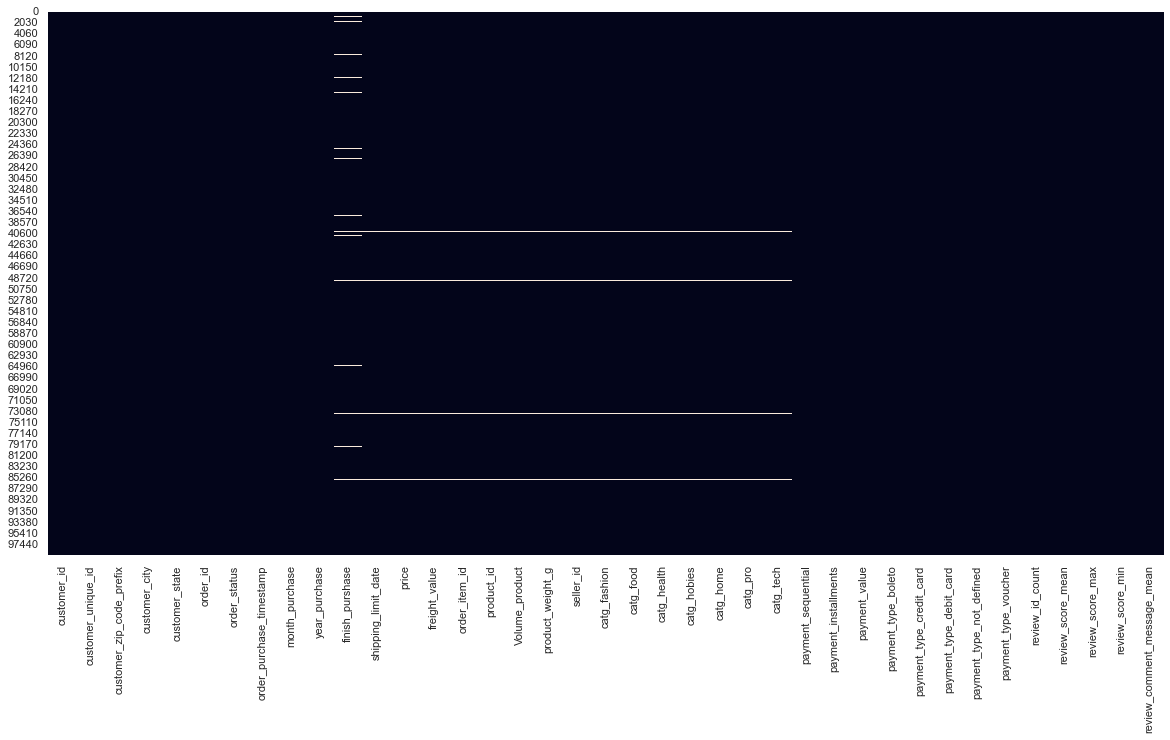

In [83]:
plt.figure(figsize=(20,10))
sns.heatmap(df_Olist.isna(),cbar=False)
plt.show()

In [84]:
df_Olist=df_Olist.drop_duplicates()

In [85]:
df_Olist.shape


(99441, 39)

In [86]:
missing_values_table(df_Olist)


The dataset has 39 columns.
There are 24 columns that have missing values.


,Missing Values,% of Total Values
finish_purshase,2965,3.0
Volume_product,791,0.8
product_weight_g,791,0.8
catg_food,775,0.8
catg_tech,775,0.8
catg_pro,775,0.8
catg_home,775,0.8
shipping_limit_date,775,0.8
catg_health,775,0.8
catg_hobies,775,0.8


In [87]:
df_Olist.dropna(subset=['price', 'freight_value'], inplace=True)


In [88]:
#processing the missing values
df_Olist['payment_value'].fillna(df_Olist['price']+df_Olist['freight_value'], inplace=True)
df_Olist['finish_purshase'].fillna(df_Olist['finish_purshase'].mean(), inplace=True)
df_Olist['Volume_product'].fillna(df_Olist['Volume_product'].mean(), inplace=True)
df_Olist['product_weight_g'].fillna(df_Olist['product_weight_g'].mean(), inplace=True)
df_Olist['payment_sequential'].fillna(df_Olist['payment_sequential'].mean(), inplace=True)
df_Olist['payment_installments'].fillna(df_Olist['payment_installments'].mean(), inplace=True)
df_Olist['payment_type_boleto'].fillna(df_Olist['payment_type_boleto'].mean(), inplace=True)
df_Olist['payment_type_credit_card'].fillna(df_Olist['payment_type_credit_card'].mean(), inplace=True)
df_Olist['payment_type_debit_card'].fillna(df_Olist['payment_type_debit_card'].mean(), inplace=True)
df_Olist['payment_type_not_defined'].fillna(df_Olist['payment_type_not_defined'].mean(), inplace=True)
df_Olist['payment_type_voucher'].fillna(df_Olist['payment_type_voucher'].mean(), inplace=True)

In [89]:
df_Olist.shape

(98666, 39)

maintenant on goupe chaque observation est un client unique , mais avant il faut séparer la data en 3 periodes, une pour créer les clusters et pour tester la stabilitée. 

In [90]:
df_Olist.order_purchase_timestamp.max()

Timestamp('2018-09-03 09:06:57')

la dernière commande est passée le 17-october 2018 

In [91]:
df_Olist.order_purchase_timestamp.min()

Timestamp('2016-09-04 21:15:19')

In [92]:
#dataframe  from the second semester 
df_Olist_T2=df_Olist[(df_Olist.year_purchase==2017) ]
#dataframe  from the first semester 
df_Olist_T1=df_Olist_T2[df_Olist_T2.month_purchase.isin([1,2,3,4,5,6])]
#data from the third semester 
df_Olist_T3=df_Olist[(df_Olist.year_purchase==2017) | (df_Olist[df_Olist.year_purchase==2018].month_purchase.isin([1,2,3,4,5,6]))]
#data from the fourth semester  
df_Olist_T4=df_Olist[(df_Olist.year_purchase==2017) | (df_Olist.year_purchase==2018)]

In [93]:
df_Olist_T3.order_purchase_timestamp.max()

Timestamp('2018-06-30 23:59:49')

In [94]:
df_Olist_T3.order_purchase_timestamp.min()

Timestamp('2017-01-05 11:56:06')

la fonction groupy va crée en créant les variables de l'analyse RFM.
- **RFM** signifie Récence, Fréquence et Valeur monétaire, chacun correspondant à une caractéristique d'un client . Ces mesures  sont des indicateurs importants du comportement d'un client:

  - Récence: à quand remonte la dernière fois qu'ils ont acheté?
  - Fréquence: à quelle fréquence et pendant combien de temps ont-ils acheté?
  - Valeur monétaire / ventes: combien ont-ils acheté


In [95]:
import datetime as dt
# Recency   -> Calculate the number of days between present date and date of last purchase each customer
# Frequency -> Calculate the number of orders for each customer
# Monetary  -> Calculate sum of purchase price for each customer
def groupy (df):
  TODAY=df.order_purchase_timestamp.max()
  df= df.groupby('customer_unique_id').agg({'order_purchase_timestamp': ['max','min'] ,#Recency and age
                                            'order_id': 'count',#Frequency  of orders per customer
                                            'payment_value': ['sum','mean','max','min'],#Monetary spent by the customer

                                            'order_status': lambda prob: prob.sum(),#number of problem purchases
                                            'price':'mean',#average item price per order
                                            'freight_value':'mean',#the average price of shipping.
                                            'order_item_id' :['sum','mean'] ,#number of products per client
                                            'seller_id':['sum','mean'],#number of sellers per order
                                            'finish_purshase': lambda finish: finish.mean(),#the average time of the purchase process (from order to delivery)

                                            'product_id':['sum','mean'],# number of different product per order
                                            'Volume_product':'mean',#average volume/order
                                            'product_weight_g':'mean',#average weight/order
                                            'catg_fashion': lambda fashion: fashion.sum(),#number of items purchased per catg
                                            'catg_food': lambda food: food.sum(),#number of items purchased per catg
                                            'catg_hobies': lambda hobies: hobies.sum(),#number of items purchased per catg
                                            'catg_home': lambda home: home.sum(),#number of items purchased per catg
                                            'catg_pro': lambda pro: pro.sum(),#number of items purchased per catg
                                            'catg_tech': lambda tech: tech.sum(),#number of items purchased per catg
                                           

                                            'payment_sequential':'sum',# number of payments by different payment methods (especially for voucher 
                                            'payment_installments': ['sum','mean','min','max'],#number of payment_installments
                                            'payment_type_boleto':'sum',#number of payment method types / order
                                            'payment_type_credit_card':'sum',#number of payment method types / order
                                            'payment_type_debit_card':'sum',#number of payment method types / order
                                            'payment_type_not_defined':'sum',#number of payment method types / order
                                            'payment_type_voucher':'sum',#number of payment method types / order

                                            'review_id_count':'sum',#nbr of review 
                                            'review_score_mean':'mean',#mean score of review
                                            'review_score_max':'max',#max score of review
                                            'review_score_min':'min',#min score of review
                                            'review_comment_message_mean': 'mean',#mean lenght of review
                                              })

  df.columns = [ '_'.join(str(i) for i in col) for col in df.columns]
  df.rename(columns = {'order_purchase_timestamp_min' : 'age',#since the first order 
                       'order_purchase_timestamp_max' : 'Recency' ,
                      'order_id_count' : 'Frequency', 
                      'payment_value_sum' : 'Monetary',
                      'payment_value_mean' : 'Monetary_mean',
                       'payment_value_max' : 'Monetary_max',
                       'payment_value_min' : 'Monetary_min',
                       'payment_value_mean' : 'Monetary_mean',
                       'seller_id_sum':'seller_Nbr',
                       'seller_id_mean':'seller_mean',
                       'finish_purshase_<lambda>':'finish_order',
                       'product_id_sum':'product_nbr',
                       'catg_fashion_<lambda>':'catg_fashion',
                       'catg_food_<lambda>':'catg_food',
                       'catg_hobies_<lambda>':'catg_hobies',
                       'catg_home_<lambda>':'catg_home',
                       'catg_pro_<lambda>':'catg_pro',
                       'catg_tech_<lambda>':'catg_tech',
                       'review_id_count_sum':'review_count',
                       'review_score_mean_mean':'review_score_mean',
                       'review_score_max_max':'review_score_max',
                       'review_score_min_min':'review_score_min',
                       'review_comment_message_mean_mean':'len_review_mean_',
                      'order_item_id_sum':'Nb_item',
                      'order_status_<lambda>':'order_probl',
                      'review_comment_message':'len_review',
                       'payment_sequential_sum':'payment_sequential',
                       'order_item_id_mean':'order_item_mean',
                       'payment_type_boleto_sum':'payment_type_boleto',
                       'payment_type_credit_card_sum':'payment_type_credit_card',
                       'payment_type_debit_card_sum':'payment_type_debit_card',
                       'payment_type_not_defined_sum':'payment_type_not_defined',
                       'payment_type_voucher_sum':'payment_type_voucher'
                       }, inplace = True)

  df['age'] = df['age'].apply(lambda date: (TODAY - date).days)+1
  df['Recency'] = df['Recency'].apply(lambda date: (TODAY - date).days)+1
  df['item_Monetary']=df['Monetary']/df['Nb_item']#average basket amount 
  df[['Recency','age']] = df[['Recency','age']].astype(int)
  df.reset_index(inplace = True)

  return df

In [96]:
#merge all of dataframes 
df_Olist_T1=groupy(df_Olist_T1)
df_Olist_T2=groupy(df_Olist_T2)
df_Olist_T3=groupy(df_Olist_T3)
df_Olist_T4=groupy(df_Olist_T4)

# Analyse Exploratoire

Analysons maintenant nos données mergés  

In [97]:
df_Olist_T4['Frequency'].value_counts()

1     92220
2      2662
3       191
4        29
5         9
6         5
7         3
9         1
16        1
Name: Frequency, dtype: int64

In [98]:
df_Olist_T4.describe()

,Recency,age,Frequency,Monetary,Monetary_mean,Monetary_max,Monetary_min,order_probl,price_mean,freight_value_mean,Nb_item,order_item_mean,seller_Nbr,seller_mean,finish_order,product_nbr,product_id_mean,Volume_product_mean,product_weight_g_mean,catg_fashion,catg_food,catg_hobies,catg_home,catg_pro,catg_tech,payment_sequential,payment_installments_sum,payment_installments_mean,payment_installments_min,payment_installments_max,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_not_defined,payment_type_voucher,review_count,review_score_mean,review_score_max,review_score_min,len_review_mean_,item_Monetary
count,95121.000000,95121.000000,95121.000000,95121.000000,95121.000000,95121.000000,95121.000000,95121.000000,95121.000000,95121.000000,95121.000000,95121.000000,95121.000000,95121.000000,95121.000000,95121.000000,95121.000000,95121.000000,95121.000000,95121.000000,95121.000000,95121.000000,95121.000000,95121.000000,95121.000000,95121.000000,95121.000000,95121.000000,95121.000000,95121.00000,95121.000000,95121.000000,95121.000000,95121.000000,95121.000000,95121.000000,95121.000000,95121.000000,95121.000000,95121.000000,95121.000000
mean,242.175545,244.825391,1.033988,165.990311,160.997082,162.503421,159.544213,0.004710,129.647193,20.896694,1.180391,1.138959,1.048076,1.013262,12.486091,1.073296,1.036833,15244.681377,2107.694801,0.037815,0.010387,0.179182,0.309711,0.094133,0.267407,1.079961,3.081107,2.966307,2.942873,2.98996,1.079961,1.079961,1.079961,1.079961,1.079961,1.039802,4.088853,4.101166,4.076250,30.527874,146.703886
std,151.274232,151.745207,0.211206,228.382838,221.239384,222.959376,220.772075,0.068466,194.347109,16.974119,0.621165,0.526501,0.251052,0.119116,9.433421,0.328314,0.218696,23314.268978,3741.370296,0.207638,0.105352,0.403830,0.527980,0.306557,0.469734,0.458265,2.965468,2.717308,2.708585,2.74805,0.458265,0.458265,0.458265,0.458265,0.458265,0.252933,1.336913,1.335717,1.350412,47.785013,199.014787
min,1.000000,5.000000,1.000000,9.590000,9.590000,9.590000,9.590000,0.000000,0.850000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,9.338571
25%,119.000000,122.000000,1.000000,63.100000,62.420000,62.680000,61.400000,0.000000,44.500000,13.470000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,1.000000,2856.000000,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,3.000000,57.800000
50%,224.000000,227.000000,1.000000,107.920000,105.770000,106.550000,104.370000,0.000000,79.990000,16.710000,1.000000,1.000000,1.000000,1.000000,10.000000,1.000000,1.000000,6552.000000,700.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,3.000000,96.710000
75%,351.000000,355.000000,1.000000,183.120000,177.090000,178.590000,175.500000,0.000000,144.950000,22.180000,1.000000,1.000000,1.000000,1.000000,15.000000,1.000000,1.000000,18400.000000,1825.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,42.000000,163.210000
max,606.000000,606.000000,16.000000,13664.080000,13664.080000,13664.080000,13664.080000,1.000000,6735.000000,1002.290000,24.000000,21.000000,16.000000,5.000000,210.000000,16.000000,8.000000,296208.000000,40425.000000,6.000000,5.000000,11.000000,11.000000,8.000000,6.000000,33.000000,64.000000,29.000000,29.000000,29.00000,33.000000,33.000000,33.000000,33.000000,33.000000,16.000000,5.000000,5.000000,5.000000,208.000000,6929.310000


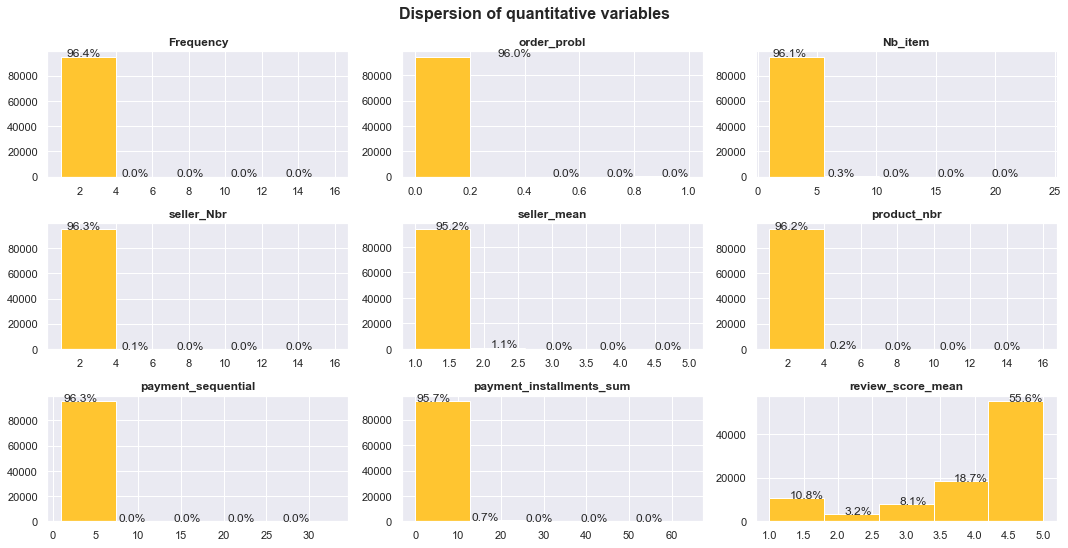

In [99]:
fig = plt.figure(figsize=(15,8))
Discret=['Frequency', 'order_probl', 'Nb_item', 'seller_Nbr',
  'seller_mean','product_nbr', 'payment_sequential',
  'payment_installments_sum','review_score_mean']
total = len(df_Olist)*1.
for i, c in enumerate(Discret,1):

        ax = fig.add_subplot(3,3,i)
        ax.set_title(c)
        ax.hist(df_Olist_T4[c], color='#ffc530',bins=5)
        #min =  df_Olist_T4[c].min()
        #max = df_Olist_T4[c].mean()+3*df_Olist_T4[c].std()
        #plt.xlim(min,max)
        ax.title.set_fontweight('bold')
        for p in ax.patches:
          ax.annotate('{:.1f}%'.format(100*p.get_height()/total),
                      (p.get_x()+0.3, p.get_height()+10))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Dispersion of quantitative variables', fontsize=16,
             fontweight='bold')

plt.show()

c:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.wa

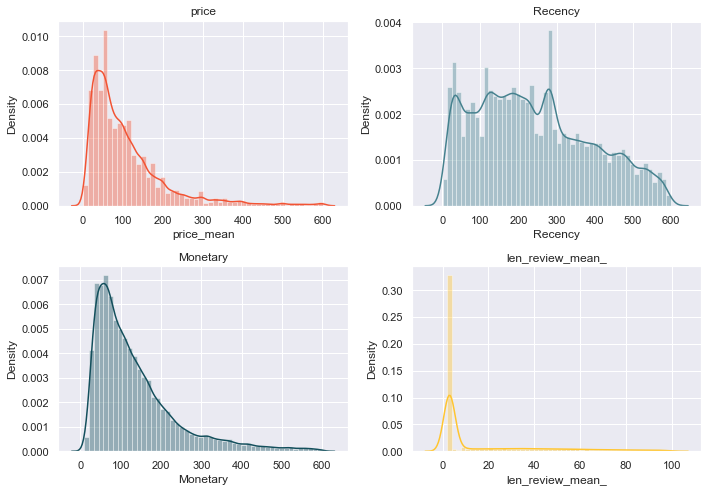

In [100]:
fig, ax = plt.subplots(2, 2, figsize=(10,7))
sns.distplot(a=df_Olist_T4[df_Olist_T4["price_mean"]<600]["price_mean"],
             hist=True, kde=True,
             rug=False,color='#f25333',
             ax=ax[0,0],).set_title("price")
sns.distplot(a=df_Olist_T4[df_Olist_T4["Recency"]<600]["Recency"],
             hist=True, kde=True, 
             rug=False,color='#45818e',
             ax=ax[0,1]).set_title("Recency")
sns.distplot(a=df_Olist_T4[df_Olist_T4["Monetary"]<600]["Monetary"],
             hist=True, kde=True,
             rug=False,color='#134f5c',
             ax=ax[1,0]).set_title("Monetary")
sns.distplot(a=df_Olist_T4[df_Olist_T4["len_review_mean_"]<100]["len_review_mean_"],
             hist=True, kde=True, 
             rug=False,color='#ffc530',
             ax=ax[1,1]).set_title("len_review_mean_")

plt.tight_layout()
plt.show()

In [101]:
RFM=['Recency', 'Frequency', 'Monetary','Monetary_mean', 'Monetary_max',
     'item_Monetary','Monetary_min',]

var_catg=['catg_fashion','catg_food', 'catg_hobies','catg_home',
          'catg_pro','catg_tech','payment_type_boleto',
          'payment_type_credit_card','payment_type_debit_card',
          'payment_type_not_defined','payment_type_voucher',]

var_carc=['order_probl','price_mean', 'freight_value_mean',
          'Nb_item', 'order_item_mean','seller_Nbr', 'seller_mean',
          'finish_order', 'product_nbr','product_id_mean',
          'Volume_product_mean', 'product_weight_g_mean',]

var_review=[ 'review_count', 'review_score_mean','review_score_max',
            'review_score_min', 'len_review_mean_',]

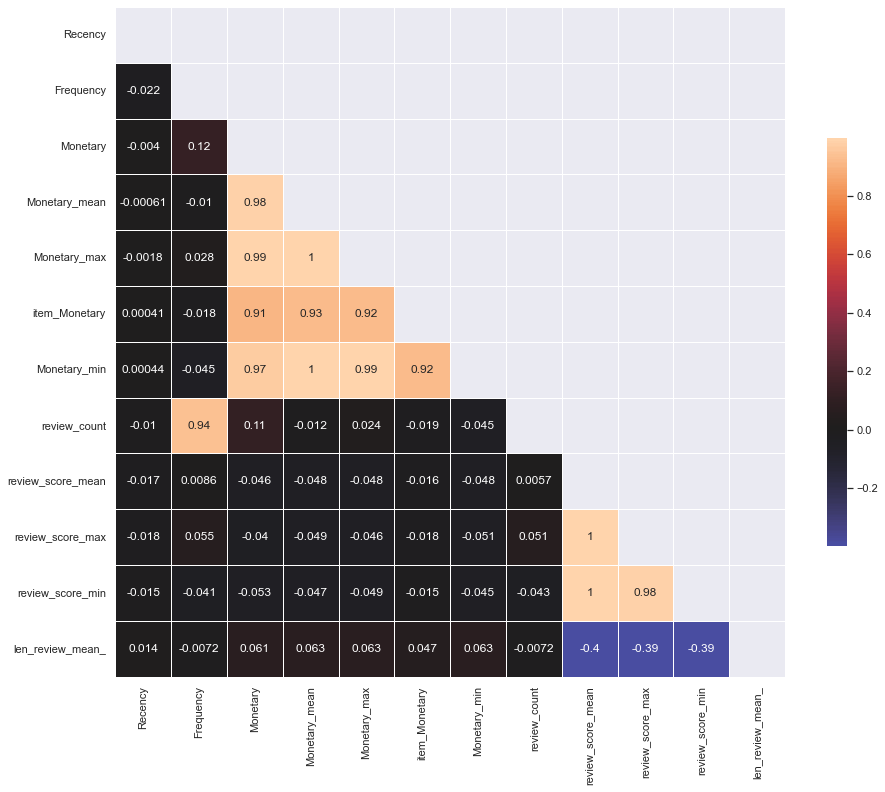

In [102]:
# Correlation matrix 
corrMatrix = df_Olist_T4[RFM+var_review].corr()
plt.figure(figsize=(15, 15))


# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corrMatrix, dtype=bool))

sns.heatmap(corrMatrix, annot=True, center=0,mask = mask,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

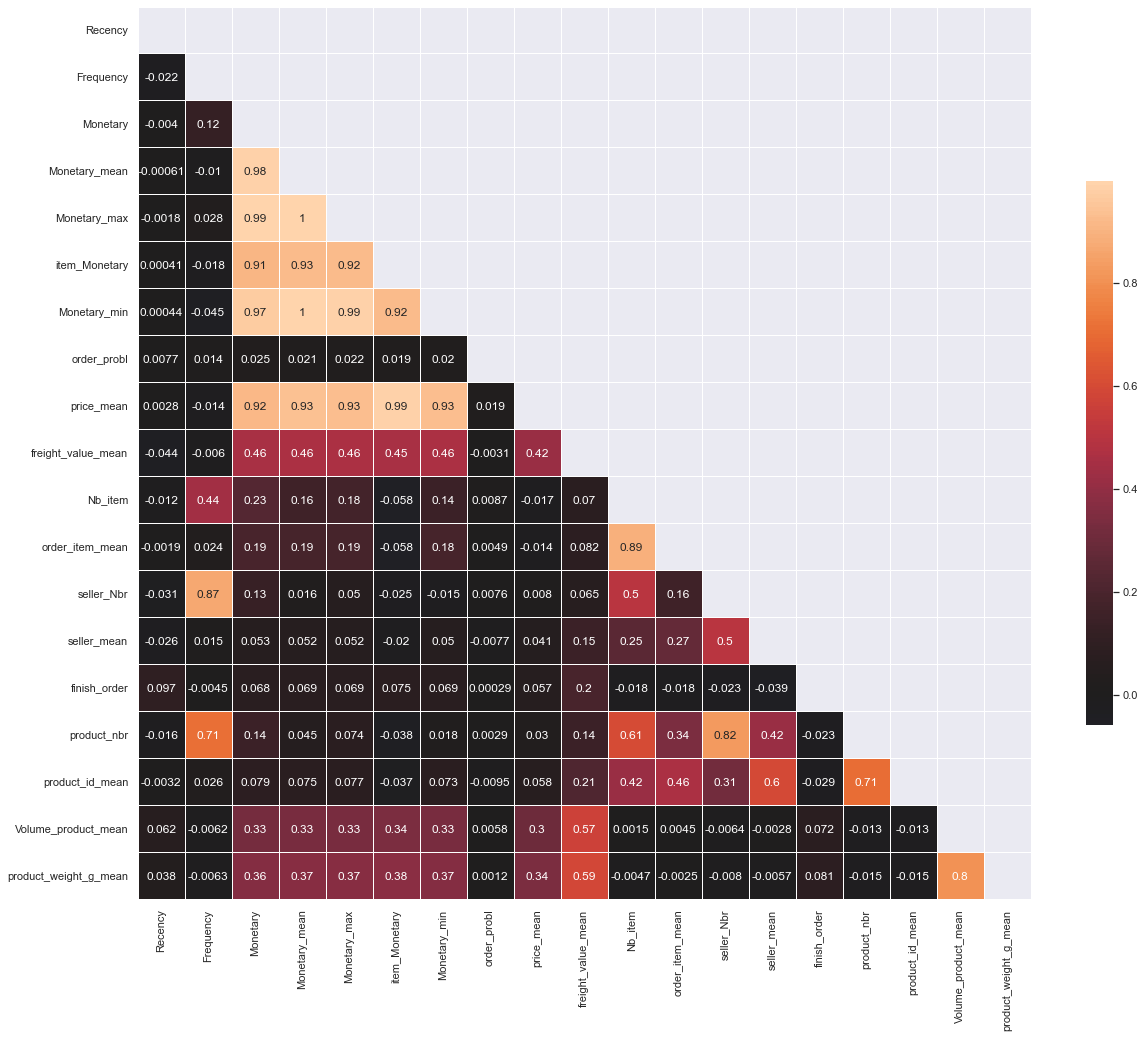

In [103]:
# Matrice de corrélation 
corrMatrix = df_Olist_T4[RFM+var_carc].corr()
plt.figure(figsize=(20, 20))


# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corrMatrix, dtype=bool))

sns.heatmap(corrMatrix, annot=True, center=0,mask = mask,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

# Sauvegarde des bases de données pour la modéliastion de

In [104]:
# Save in CSV format
df_Olist_T1.to_csv('data/df_Olist_T1.csv',index=False)
df_Olist_T2.to_csv('data/df_Olist_T2.csv',index=False)
df_Olist_T3.to_csv('data/df_Olist_T3.csv',index=False)
df_Olist_T4.to_csv('data/df_Olist_T4.csv',index=False)
df_Olist.to_csv('data/df_Olist.csv',index=False)